# Context

The data worked on in this project was gotten from the Women in Data Africa Datathon 2023. No direct question was asked in the Datathon. However, we were asked to extract valuable insights into the evolution of women's soccer over the years, the performance of the top teams and players, and/or the strategies used by coaches to succeed in this highly competitive sport. 

Hence, we decided to explore our data to draw insights on the strategies used by coaches and teams to succeed in the FIFA world cup. 

**Project Order:**

<ul>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#dict">Data Dictionary</a></li>
<li><a href="#out">Handling Outliers and Univariate Analysis</a></li>
<li><a href="#bi">Bivariate Analysis</a></li>
<li><a href="#multi">Correlation Analysis</a></li>
<li><a href="#statistics">Statistical Modelling</a></li>
<li><a href="#Con">Conclusions</a></li>
<li><a href="#Rec">Recommendations</a></li>
</ul>

<a id='wrangling'></a>
# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [2]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    return df

In [3]:
df = wrangle(r'C:\Users\USER\Downloads\archive (4)\womens-world-cup.csv')
df.head()

,id,squad,year,players,age,possesion,matches_played,starts,min_playing_time,minutes_played_90s,...,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards,goals_per_90,assists_per_90,goals_plus_assists_per_90,goals_minus_penalty_kicks_per_90,goals_plus_assists_minus_penalty_kicks_per_90
0,1,Argentina,2019,18,26.8,34.7,3,33,270,3.0,...,1,1,1,3.0,0.0,0.67,0.33,1.00,0.33,0.67
1,2,Australia,2019,18,25.4,61.3,4,44,390,4.3,...,8,0,1,2.0,0.0,1.85,0.92,2.77,1.85,2.77
2,3,Brazil,2019,18,29.7,51.5,4,44,390,4.3,...,5,2,3,7.0,0.0,1.62,0.69,2.31,1.15,1.85
3,4,Cameroon,2019,20,27.7,36.0,4,44,360,4.0,...,3,0,0,6.0,0.0,0.75,0.75,1.50,0.75,1.50
4,5,Canada,2019,16,27.0,63.0,4,44,360,4.0,...,4,0,1,2.0,0.0,1.00,0.75,1.75,1.00,1.75


<a id='dict'></a>
# Data Dictionary

- **id** - This is the number used to identify each row uniquely

- **squad** -  These are the teams that made it to the groupstage of the FIFA tournament

- **players** - The number of players in the team during that season

- **Age** - The average ages of all players in a team

- **year** - This is the year of the FIFA tournament

- **possesion** - This is the percentage of time that a FIFA team had possession of the ball during a match. Formula = Number of passes on each team during the match divided by total number of passes in the game

- **matches_played** - The number of matches a FIFA team participated in during the tournament.

- **starts** - The number of matches in which a player was included in the starting lineup for the FIFA team. That is, number of players that started the game for total number of matches

- **min_playing_time** - The total time(in minutes) for all matches played by the team

- **minutes_played_90s** - The number of minutes a player spent on the field per 90 minutes of play time during the FIFA tournament.

- **goals** - The number of goals scored by the FIFA team during the tournament.

- **Assists** - The number of assists (pass or cross leading to a goal) made by the FIFA team during the tournament. An assist is awarded to the player who had given the last pass to the goalscorer.

- **non_penalty_goals** - The number of goals scored by the FIFA team from open play (excluding penalty kicks) during the tournament.

- **penalty_kicks_made** - The number of penalty kicks by a team that scored goals

- **penalty_kicks_attempted** - The number of penalty kicks taken by a team during the season.

- **yellow_cards** - The number of yellow cards received by a team during the season as a result of committing a foul.

- **red_cards** - The number of red cards received by a team during the season as a result of committing a severe foul or unsportsmanlike behavior.

- **goals_per_90** - The number of goals scored by a team per 90 minutes of play time.

- **assists_per_90** - The number of assists made by a team per 90 minutes of play time.

- **goals_plus_assists_per_90** - The number of assists made by a team per 90 minutes of play time.

- **goals_minus_assists_per_90** - The number of goals scored by a team from open play per 90 minutes of play time.

- **goals_plus_assists_minus_penalty_kicks_per_90** -  The combined number of goals and assists made by a team from open play per 90 minutes of play time.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   id                                             136 non-null    int64  
 1   squad                                          136 non-null    object 
 2   year                                           136 non-null    int64  
 3   players                                        136 non-null    int64  
 4   age                                            136 non-null    float64
 5   possesion                                      96 non-null     float64
 6   matches_played                                 136 non-null    int64  
 7   starts                                         136 non-null    int64  
 8   min_playing_time                               136 non-null    int64  
 9   minutes_played_90s                             136 non

# Observation

The results here shows that some rows in the **possession, yellow_cards, and red_cards columns** have some null values. A close look into the possession column revealed that all teams from 1991 to 1999 matches had null values. 

This could be that those records were not inputted. Hence, there's the need to fill in the values with valid numbers. To know if the mean is the best value to fill it in, let's calculate the summary statistics of all columns. 

Before we do that, let's change the 'id' and 'year' columns into categorical data

In [5]:
# Convert id and year columns to categorical data
df['id'] = df['id'].astype(str)
df['year'] = df['year'].astype(str)

# Check the new datatypes of the columns
print(df.dtypes)

id                                                object
squad                                             object
year                                              object
players                                            int64
age                                              float64
possesion                                        float64
matches_played                                     int64
starts                                             int64
min_playing_time                                   int64
minutes_played_90s                               float64
goals                                              int64
assists                                            int64
non_penalty_goals                                  int64
penalty_kicks_made                                 int64
penalty_kicks_attempted                            int64
yellow_cards                                     float64
red_cards                                        float64
goals_per_90                   

In [6]:
# find summary statistics of dataset

df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,players,age,possesion,matches_played,starts,min_playing_time,minutes_played_90s,goals,assists,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards,goals_per_90,assists_per_90,goals_plus_assists_per_90,goals_minus_penalty_kicks_per_90,goals_plus_assists_minus_penalty_kicks_per_90
count,136.000000,136.000000,96.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,62.000000,62.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,17.330882,25.274265,49.252083,4.176471,45.941176,378.147059,4.200735,6.566176,3.154412,6.161765,0.404412,0.463235,2.483871,0.080645,1.375735,0.651324,2.027574,1.294265,1.946397
std,1.712936,1.962462,6.584783,1.298902,14.287920,122.916565,1.361780,5.764132,3.612486,5.528674,0.754038,0.859872,2.434331,0.274512,0.923320,0.633787,1.405935,0.898872,1.365997
min,13.000000,18.200000,30.000000,3.000000,33.000000,240.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,24.275000,46.275000,3.000000,33.000000,270.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.670000,0.000000,1.000000,0.600000,0.787500
50%,17.000000,25.300000,49.400000,4.000000,44.000000,360.000000,4.000000,5.000000,2.000000,4.500000,0.000000,0.000000,2.000000,0.000000,1.250000,0.500000,1.750000,1.075000,1.725000
75%,18.000000,26.800000,53.350000,5.000000,55.000000,480.000000,5.300000,10.000000,5.000000,9.000000,1.000000,1.000000,4.000000,0.000000,1.947500,1.000000,3.000000,1.800000,3.000000
max,23.000000,29.700000,63.000000,7.000000,77.000000,690.000000,7.700000,25.000000,17.000000,25.000000,4.000000,4.000000,8.000000,1.000000,4.690000,2.430000,6.750000,4.500000,6.560000


# Observation

Fortunately, the mean and median(50%) of all variables are so close. This hints that there might not be much outliers. However, we'll be using the median instead just to be on a safe side. But, we should be careful when doing this. We are not filling all null values with the same median. instead, we are filling null values for each team with the medians from their respective teams. 

In [7]:
# show the means of all teams 

df1 = df.groupby('squad')['possesion'].median().round()
print(df1)

squad
Argentina         38.0
Australia         49.0
Brazil            55.0
Cameroon          42.0
Canada            47.0
Chile             42.0
China PR          48.0
Chinese Taipei     NaN
Colombia          47.0
Costa Rica        42.0
Côte d'Ivoire     45.0
Denmark           51.0
Ecuador           39.0
England           51.0
Equ. Guinea       41.0
France            53.0
Germany           52.0
Ghana             50.0
Italy             43.0
Jamaica           37.0
Japan             55.0
Korea DPR         52.0
Korea Rep         49.0
Mexico            50.0
Netherlands       53.0
New Zealand       43.0
Nigeria           51.0
Norway            51.0
Russia            45.0
Scotland          47.0
South Africa      38.0
Spain             57.0
Sweden            48.0
Switzerland       55.0
Thailand          35.0
USA               53.0
Name: possesion, dtype: float64


# Observation

According to the output above, all teams have medians except Chinese Taipei. Hence, we'll be filling the empty value of Chinese Taipei with the overall median. This wouldn't affect our analysis significantly since this implies that Chinese Taipei only made it to the group stage between 1991 and 1999.

In [8]:
# create a condition to fill empty cells with overall median if there's no team median OR
# fill the empty cells with team medians if they exist

if df1.isnull().any():
    df['possesion'] = df['possesion'].fillna(df['possesion'].median().round())
else:
    df.loc[df['possesion'].isnull(), 'possesion'] = df.loc[df['possesion'].isnull(), 'squad'].map(df1)
df

,id,squad,year,players,age,possesion,matches_played,starts,min_playing_time,minutes_played_90s,...,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards,goals_per_90,assists_per_90,goals_plus_assists_per_90,goals_minus_penalty_kicks_per_90,goals_plus_assists_minus_penalty_kicks_per_90
0,1,Argentina,2019,18,26.8,34.7,3,33,270,3.0,...,1,1,1,3.0,0.0,0.67,0.33,1.00,0.33,0.67
1,2,Australia,2019,18,25.4,61.3,4,44,390,4.3,...,8,0,1,2.0,0.0,1.85,0.92,2.77,1.85,2.77
2,3,Brazil,2019,18,29.7,51.5,4,44,390,4.3,...,5,2,3,7.0,0.0,1.62,0.69,2.31,1.15,1.85
3,4,Cameroon,2019,20,27.7,36.0,4,44,360,4.0,...,3,0,0,6.0,0.0,0.75,0.75,1.50,0.75,1.50
4,5,Canada,2019,16,27.0,63.0,4,44,360,4.0,...,4,0,1,2.0,0.0,1.00,0.75,1.75,1.00,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,132,New Zealand,1991,15,25.5,49.0,3,33,240,2.7,...,1,0,0,NaN,NaN,0.37,0.37,0.75,0.37,0.75
132,133,Nigeria,1991,17,18.2,49.0,3,33,240,2.7,...,0,0,0,NaN,NaN,0.00,0.00,0.00,0.00,0.00
133,134,Norway,1991,15,24.1,49.0,6,66,500,5.6,...,12,1,1,NaN,NaN,2.34,1.08,3.42,2.16,3.24
134,135,Sweden,1991,18,25.4,49.0,6,66,480,5.3,...,16,1,1,NaN,NaN,3.19,2.06,5.25,3.00,5.06


In [9]:
# Let's repeat this for the yellow and red cards columns
df2 = df.groupby('squad')['yellow_cards'].median().round()
df3 = df.groupby('squad')['red_cards'].median().round()

In [10]:
#We'll be filling "0" for teams that don't have median for yellow and/or red card
# For Yellow Card
if df2.isnull().any():
    df.fillna(0, inplace=True)
else:
    df.loc[df['yellow_cards'].isnull(), 'yellow_cards'] = df.loc[df['yellow_cards'].isnull(), 'squad'].map(df2)

# For Red Card    
if df2.isnull().any():
    df.fillna(0, inplace=True)
else:
    df.loc[df['yellow_cards'].isnull(), 'yellow_cards'] = df.loc[df['yellow_cards'].isnull(), 'squad'].map(df3)

df

,id,squad,year,players,age,possesion,matches_played,starts,min_playing_time,minutes_played_90s,...,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards,goals_per_90,assists_per_90,goals_plus_assists_per_90,goals_minus_penalty_kicks_per_90,goals_plus_assists_minus_penalty_kicks_per_90
0,1,Argentina,2019,18,26.8,34.7,3,33,270,3.0,...,1,1,1,3.0,0.0,0.67,0.33,1.00,0.33,0.67
1,2,Australia,2019,18,25.4,61.3,4,44,390,4.3,...,8,0,1,2.0,0.0,1.85,0.92,2.77,1.85,2.77
2,3,Brazil,2019,18,29.7,51.5,4,44,390,4.3,...,5,2,3,7.0,0.0,1.62,0.69,2.31,1.15,1.85
3,4,Cameroon,2019,20,27.7,36.0,4,44,360,4.0,...,3,0,0,6.0,0.0,0.75,0.75,1.50,0.75,1.50
4,5,Canada,2019,16,27.0,63.0,4,44,360,4.0,...,4,0,1,2.0,0.0,1.00,0.75,1.75,1.00,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,132,New Zealand,1991,15,25.5,49.0,3,33,240,2.7,...,1,0,0,0.0,0.0,0.37,0.37,0.75,0.37,0.75
132,133,Nigeria,1991,17,18.2,49.0,3,33,240,2.7,...,0,0,0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
133,134,Norway,1991,15,24.1,49.0,6,66,500,5.6,...,12,1,1,0.0,0.0,2.34,1.08,3.42,2.16,3.24
134,135,Sweden,1991,18,25.4,49.0,6,66,480,5.3,...,16,1,1,0.0,0.0,3.19,2.06,5.25,3.00,5.06


In [11]:
# now let's check if we still have any null values

df.info()

# finally all null values have been adequately filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   id                                             136 non-null    object 
 1   squad                                          136 non-null    object 
 2   year                                           136 non-null    object 
 3   players                                        136 non-null    int64  
 4   age                                            136 non-null    float64
 5   possesion                                      136 non-null    float64
 6   matches_played                                 136 non-null    int64  
 7   starts                                         136 non-null    int64  
 8   min_playing_time                               136 non-null    int64  
 9   minutes_played_90s                             136 non

In [12]:
# let's drop duplicates of there are any

df.drop_duplicates
df

# No duplicates confirmed. Time for exploration!

,id,squad,year,players,age,possesion,matches_played,starts,min_playing_time,minutes_played_90s,...,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards,goals_per_90,assists_per_90,goals_plus_assists_per_90,goals_minus_penalty_kicks_per_90,goals_plus_assists_minus_penalty_kicks_per_90
0,1,Argentina,2019,18,26.8,34.7,3,33,270,3.0,...,1,1,1,3.0,0.0,0.67,0.33,1.00,0.33,0.67
1,2,Australia,2019,18,25.4,61.3,4,44,390,4.3,...,8,0,1,2.0,0.0,1.85,0.92,2.77,1.85,2.77
2,3,Brazil,2019,18,29.7,51.5,4,44,390,4.3,...,5,2,3,7.0,0.0,1.62,0.69,2.31,1.15,1.85
3,4,Cameroon,2019,20,27.7,36.0,4,44,360,4.0,...,3,0,0,6.0,0.0,0.75,0.75,1.50,0.75,1.50
4,5,Canada,2019,16,27.0,63.0,4,44,360,4.0,...,4,0,1,2.0,0.0,1.00,0.75,1.75,1.00,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,132,New Zealand,1991,15,25.5,49.0,3,33,240,2.7,...,1,0,0,0.0,0.0,0.37,0.37,0.75,0.37,0.75
132,133,Nigeria,1991,17,18.2,49.0,3,33,240,2.7,...,0,0,0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
133,134,Norway,1991,15,24.1,49.0,6,66,500,5.6,...,12,1,1,0.0,0.0,2.34,1.08,3.42,2.16,3.24
134,135,Sweden,1991,18,25.4,49.0,6,66,480,5.3,...,16,1,1,0.0,0.0,3.19,2.06,5.25,3.00,5.06


<a id='out'></a>
# Handling Outliers and Univariate Analysis

## Outliers for "Players" Column

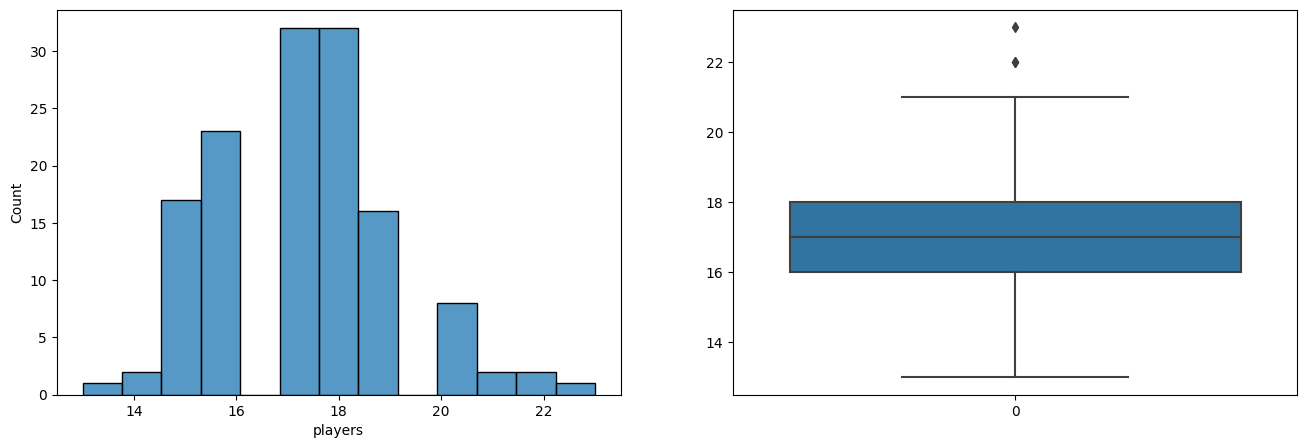

In [13]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['players'])
plt.subplot(1,2,2)
sns.boxplot(df['players'])
plt.show()

# Comment: There are outliers and they need to be handled by capping them so it won't affect our analysis

In [14]:
# cap the outliers by copying the data into a new dataframe before performing the capping

percentile25 = df['players'].quantile(0.25)
percentile75 = df['players'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df_cap = df.copy()
new_df_cap['players'] = np.where(
    new_df_cap['players'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['players'] < lower_limit,
        lower_limit,
        new_df_cap['players']
    )
)

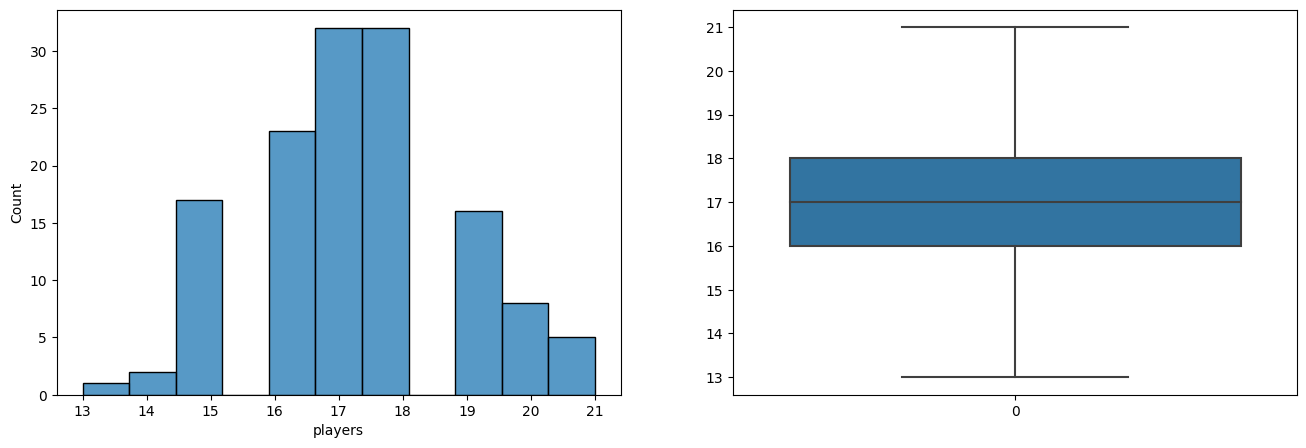

In [15]:
# show distribution after capping

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(new_df_cap['players'])
plt.subplot(1,2,2)
sns.boxplot(new_df_cap['players'])
plt.show()

In [16]:
# set all age data in the new dataframe into the old dataframe and delete the newly created dataframe
df['players'] = new_df_cap['players'].astype(int)

del new_df_cap

## Univariate Analysis of players column

According to our results after capping the outliers, most teams have total players within the range of 16-18 players. There are also lower and higher extremes at 13 and 21 players respectively but only very few teams have these number of players

## Outliers for age Column

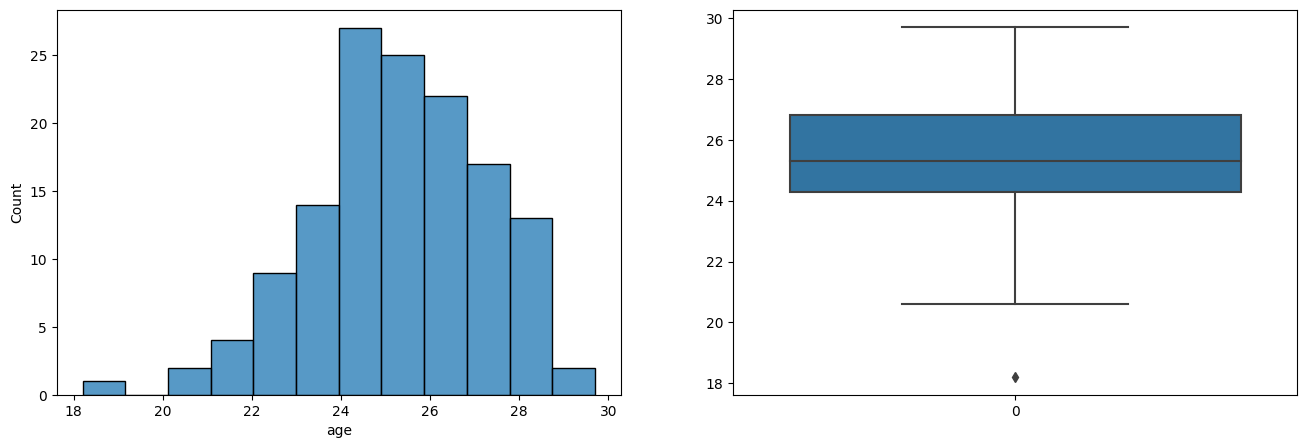

In [17]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['age'])
plt.subplot(1,2,2)
sns.boxplot(df['age'])
plt.show()

In [18]:
# cap the outliers by copying the data into a new dataframe before performing the capping

percentile25 = df['age'].quantile(0.25)
percentile75 = df['age'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df_cap = df.copy()
new_df_cap['age'] = np.where(
    new_df_cap['age'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['age'] < lower_limit,
        lower_limit,
        new_df_cap['age']
    )
)

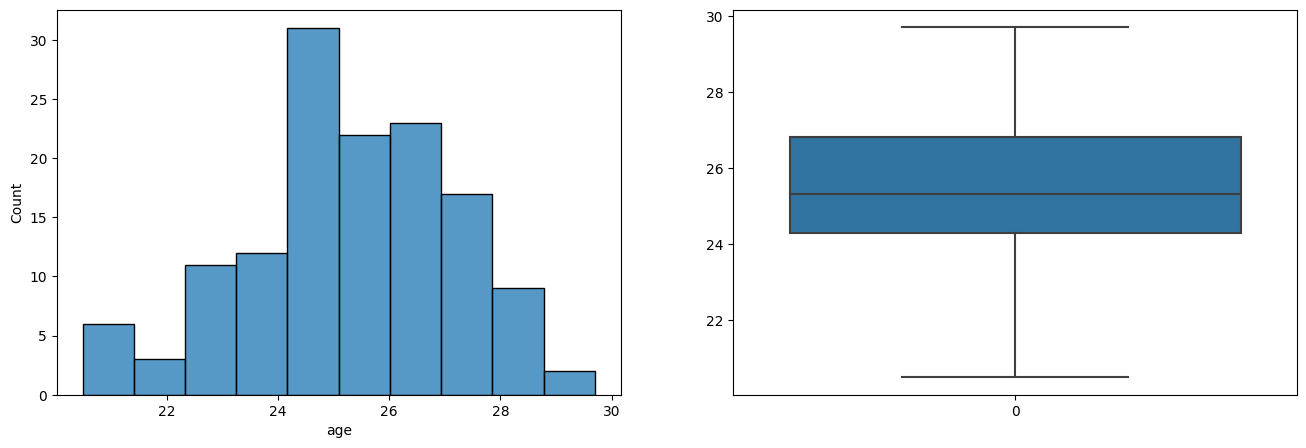

In [19]:
# show distribution after capping

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(new_df_cap['age'])
plt.subplot(1,2,2)
sns.boxplot(new_df_cap['age'])
plt.show()

In [20]:
# set all age data in the new dataframe into the old dataframe and delete the newly created dataframe
df['age'] = new_df_cap['age'].astype(int)

del new_df_cap

## Univariate analysis for age column

The average age of players in teams are mostly within the range of 24-26 years. However, there are low and high extremes of 21 and 29 years. 

## Outliers for possesion column

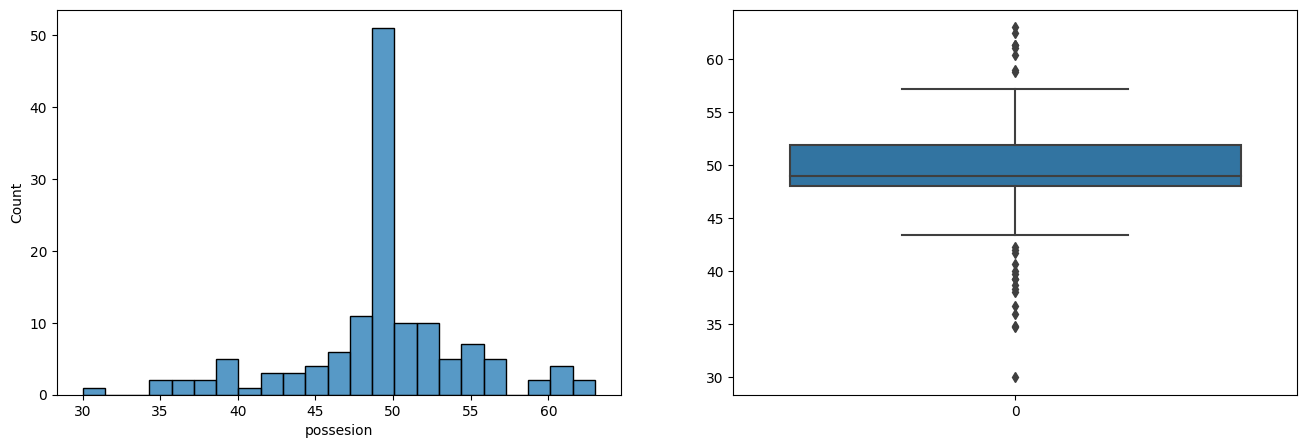

In [21]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['possesion'])
plt.subplot(1,2,2)
sns.boxplot(df['possesion'])
plt.show()

# Comment: This feature is obviously skewed. Capping it will help. But first, let's see how many outliers are there

In [22]:
# determine number of outliers
Q1 = df['possesion'].quantile(0.25)
Q3 = df['possesion'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
outliers = []
outliers = df.loc[(df['possesion'] < lower_fence) | (df['possesion'] > upper_fence), 'possesion']
print(len(outliers))

24


In [23]:
# cap the outliers by copying the data into a new dataframe before performing the capping

percentile25 = df['possesion'].quantile(0.25)
percentile75 = df['possesion'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df_cap = df.copy()
new_df_cap['possesion'] = np.where(
    new_df_cap['possesion'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['possesion'] < lower_limit,
        lower_limit,
        new_df_cap['possesion']
    )
)

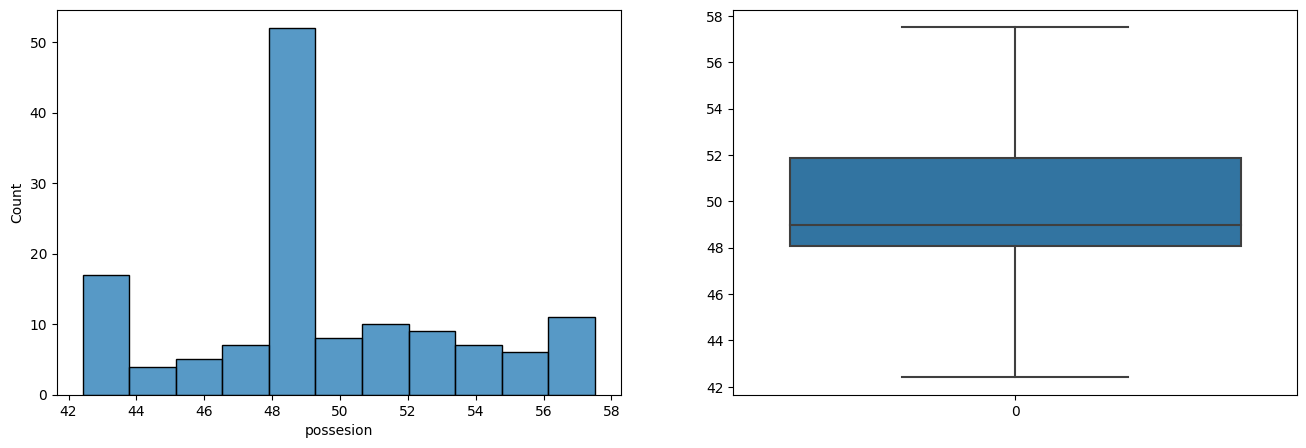

In [24]:
# show distribution after capping

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(new_df_cap['possesion'])
plt.subplot(1,2,2)
sns.boxplot(new_df_cap['possesion'])
plt.show()

In [25]:
# set all data in the new dataframe into the old dataframe and delete the newly created dataframe
df['possesion'] = new_df_cap['possesion'].astype(int)

del new_df_cap

# Univariate analysis of possesion column

Most teams have about 49 possesions. few have possesions outside this number.

## Outliers for matches_played column

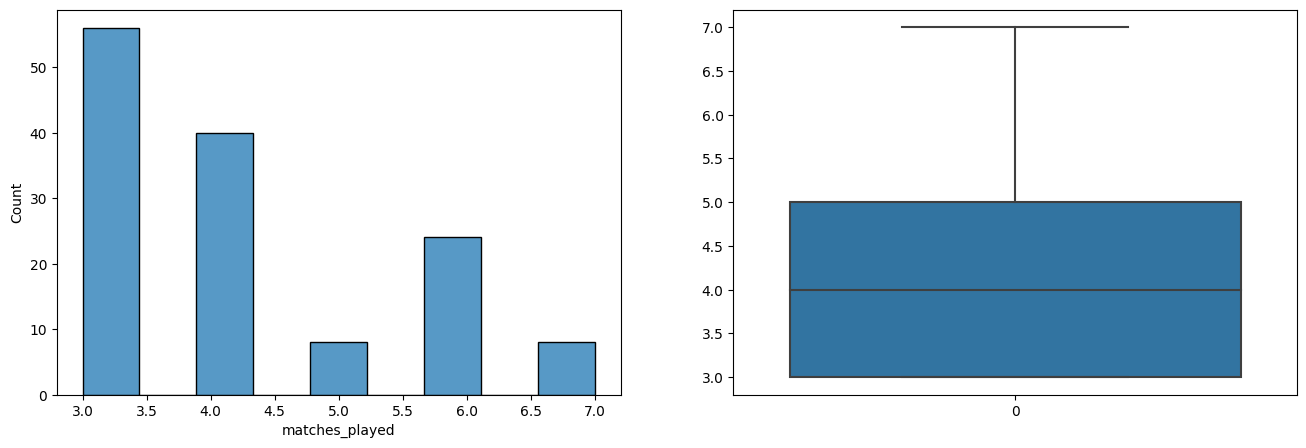

In [26]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['matches_played'])
plt.subplot(1,2,2)
sns.boxplot(df['matches_played'])
plt.show()

## Univariate analysis for matches_played column

There are no outliers here. Most matches played are 3. This could be due to the highest number of teams making it to the groupstage but only selected few moving to the next stages. Notice how the frequency reduces as the number of matches increases.

## Outliers for "starts" column

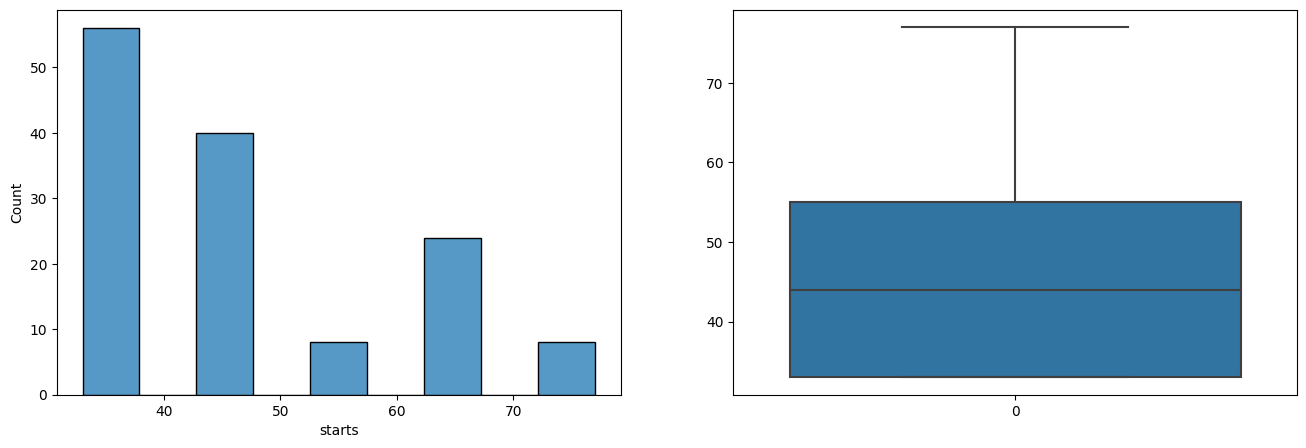

In [27]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['starts'])
plt.subplot(1,2,2)
sns.boxplot(df['starts'])
plt.show()

## Univariate analysis for starts column

The distribution of this is similar to the matches_played column most likely because the starts column is derived from the matches_played column. 

## Outliers for "min_playing_time" column

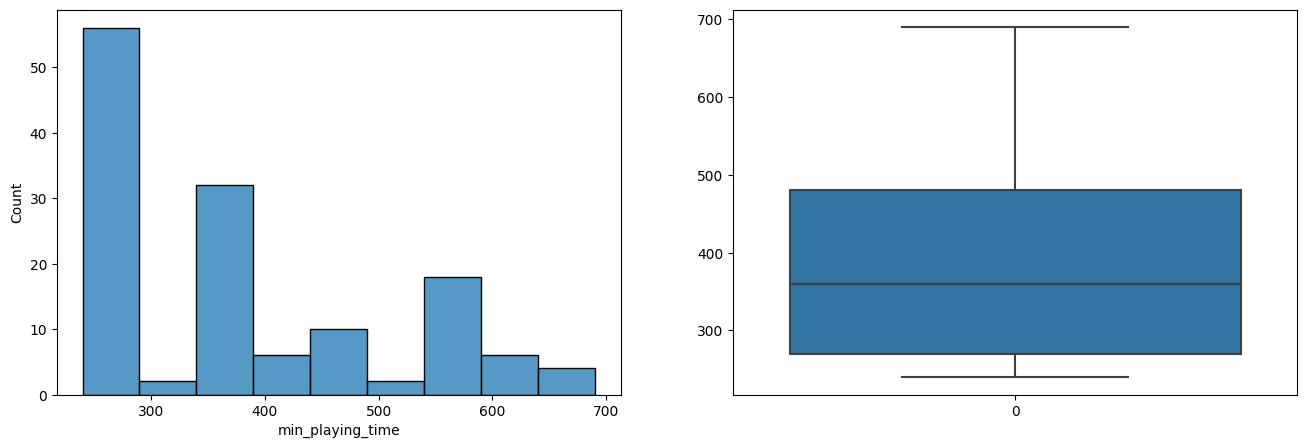

In [28]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['min_playing_time'])
plt.subplot(1,2,2)
sns.boxplot(df['min_playing_time'])
plt.show()

## Univariate analysis for min_playing_time column

Just like the matches_played and starts columns, as the total playing time(in minutes) increases, the frequency reduces. This is because not all teams make it to the next stage and as they are cut off the game, their playing time is also cut off.

## Outliers for "minutes_played_90s" column

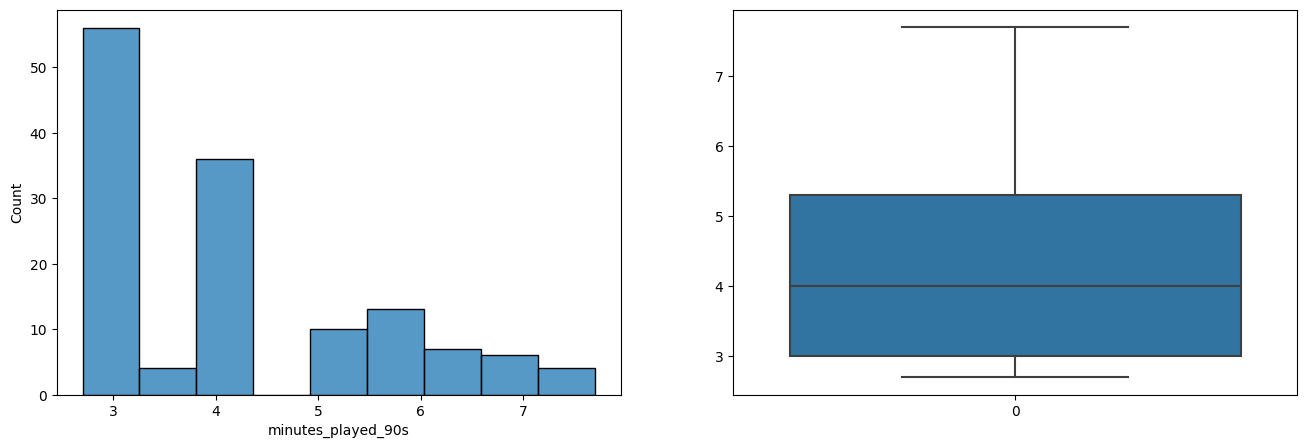

In [29]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['minutes_played_90s'])
plt.subplot(1,2,2)
sns.boxplot(df['minutes_played_90s'])
plt.show()

## Univariate analysis for minutes_played_90s

The observation of min_playing_time also applies to this because minutes_played_90s is derived from min_playing_time.

## Outliers for "goals" column

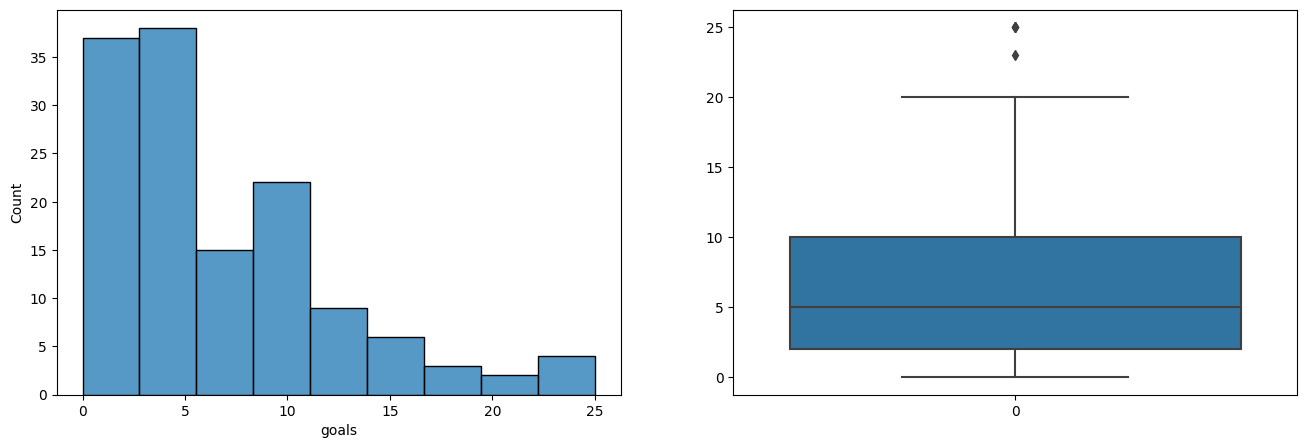

In [30]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['goals'])
plt.subplot(1,2,2)
sns.boxplot(df['goals'])
plt.show()

# comment: There are two outliers here. We could choose to leave them or cap them but just so that our analysis 
# won't be affected by any means, we'll cap them but won't use the 75:25 capping but we'll use 80:20 capping. 

In [31]:
# cap the outliers by copying the data into a new dataframe before performing the capping

percentile20 = df['goals'].quantile(0.20)
percentile80 = df['goals'].quantile(0.80)
iqr = percentile80 - percentile20

upper_limit = percentile80 + 1.5 * iqr
lower_limit = percentile20 - 1.5 * iqr

new_df_cap = df.copy()
new_df_cap['goals'] = np.where(
    new_df_cap['goals'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['goals'] < lower_limit,
        lower_limit,
        new_df_cap['goals']
    )
)

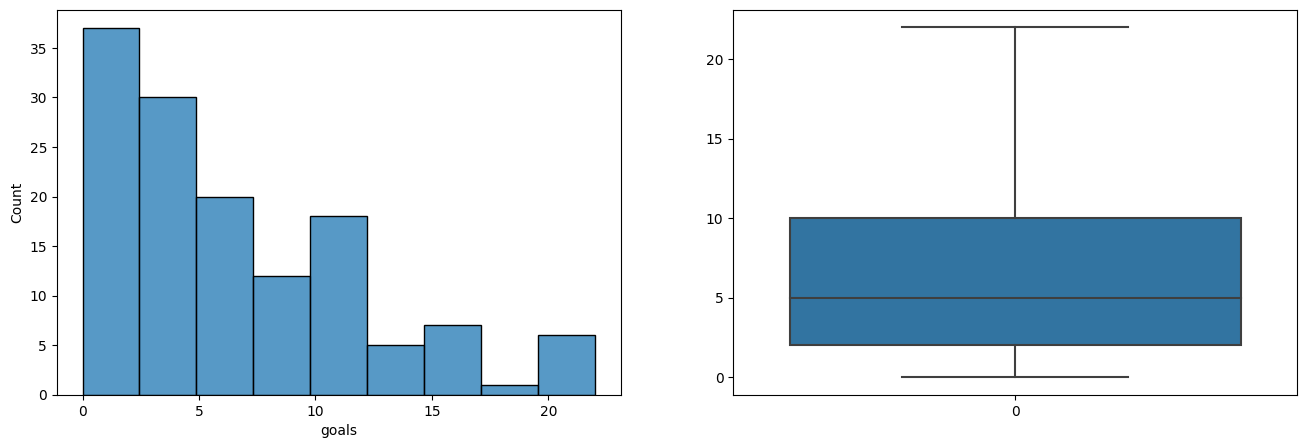

In [32]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(new_df_cap['goals'])
plt.subplot(1,2,2)
sns.boxplot(new_df_cap['goals'])
plt.show()

In [33]:
# set all age data in the new dataframe into the old dataframe and delete the newly created dataframe
df['goals'] = new_df_cap['goals'].astype(int)

del new_df_cap

# Observation

Most teams scored less goals between the range of 0-5. This is a hint that most teams are either too competitive that they stop each other from scoring and leave with draw and resort to penalties or they are less competitive where the few hardworking teams score higher and leave most teams behind. 

## Outliers for "assists" column

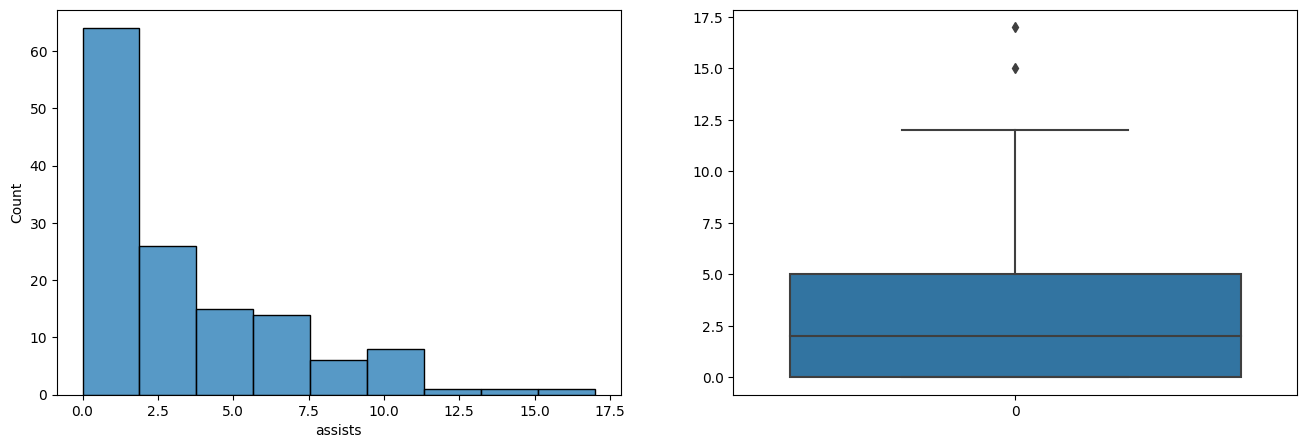

In [34]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['assists'])
plt.subplot(1,2,2)
sns.boxplot(df['assists'])
plt.show()

In [35]:
# cap the outliers by copying the data into a new dataframe before performing the capping

percentile25 = df['assists'].quantile(0.25)
percentile75 = df['assists'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df_cap = df.copy()
new_df_cap['assists'] = np.where(
    new_df_cap['assists'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['assists'] < lower_limit,
        lower_limit,
        new_df_cap['assists']
    )
)

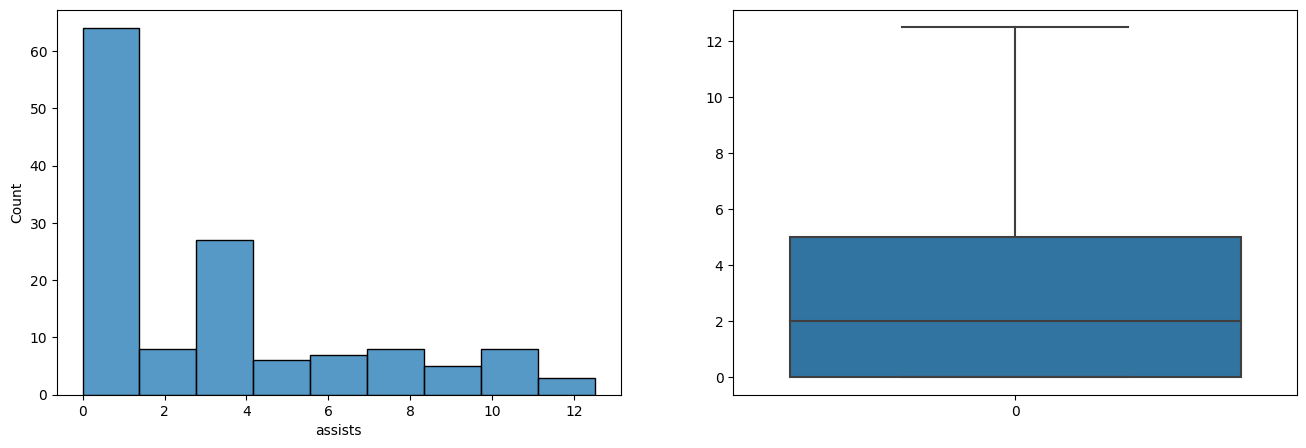

In [36]:
# distribution after capping
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(new_df_cap['assists'])
plt.subplot(1,2,2)
sns.boxplot(new_df_cap['assists'])
plt.show()

In [37]:
# set all age data in the new dataframe into the old dataframe and delete the newly created dataframe
df['assists'] = new_df_cap['assists'].astype(int)

del new_df_cap

## Univariate analysis for assists

Most teams have 0 or 1 assists for their goals. This could mean that the strategies of most teams are dependent on individual efforts and not team play. However, we'll find out later which of these strategies are more likely to take a team to the top

# Outliers for non_penalty_goals

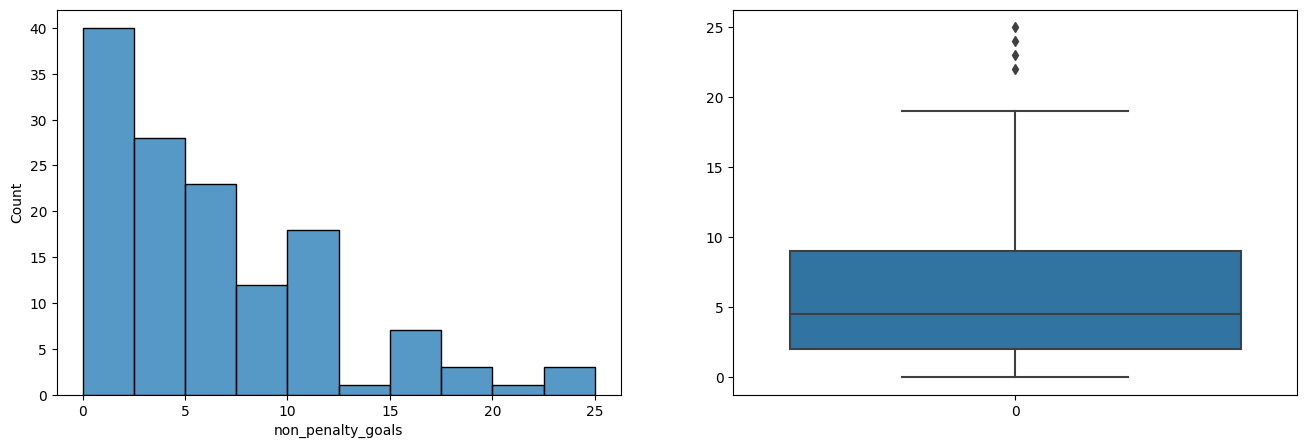

In [38]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['non_penalty_goals'])
plt.subplot(1,2,2)
sns.boxplot(df['non_penalty_goals'])
plt.show()

In [39]:
# cap the outliers by copying the data into a new dataframe before performing the capping

percentile25 = df['non_penalty_goals'].quantile(0.25)
percentile75 = df['non_penalty_goals'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df_cap = df.copy()
new_df_cap['non_penalty_goals'] = np.where(
    new_df_cap['non_penalty_goals'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['non_penalty_goals'] < lower_limit,
        lower_limit,
        new_df_cap['non_penalty_goals']
    )
)

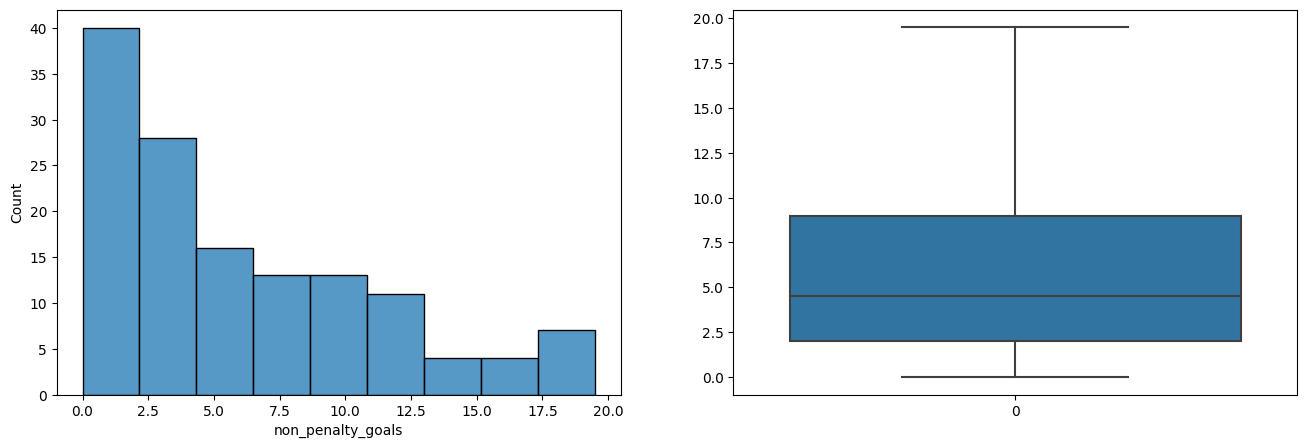

In [40]:
# distribution after capping
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(new_df_cap['non_penalty_goals'])
plt.subplot(1,2,2)
sns.boxplot(new_df_cap['non_penalty_goals'])
plt.show()

In [41]:
# set all age data in the new dataframe into the old dataframe and delete the newly created dataframe
df['non_penalty_goals'] = new_df_cap['non_penalty_goals'].astype(int)

del new_df_cap

## Univariate analysis for non_penalty_goals

Most teams score between 0 and 3 goals. We can't say much about this metric because there's no data available to compare different team matches and judge the degree of competition

## Outliers for penalty_kicks_made

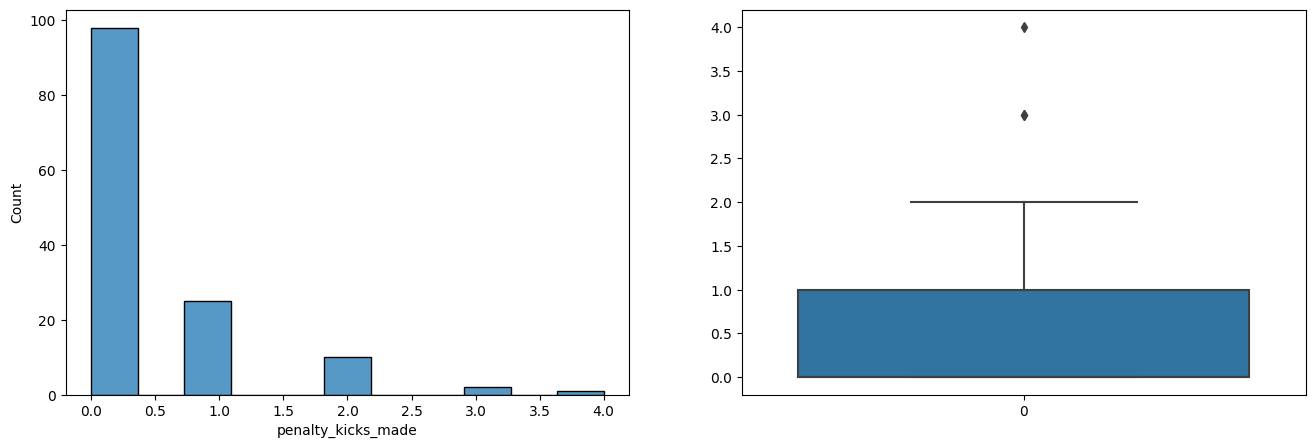

In [42]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['penalty_kicks_made'])
plt.subplot(1,2,2)
sns.boxplot(df['penalty_kicks_made'])
plt.show()

In [43]:
# cap the outliers by copying the data into a new dataframe before performing the capping

percentile10 = df['penalty_kicks_made'].quantile(0.10)
percentile90 = df['penalty_kicks_made'].quantile(0.90)
iqr = percentile90 - percentile10

upper_limit = percentile90 + 1.5 * iqr
lower_limit = percentile10 - 1.5 * iqr

new_df_cap = df.copy()
new_df_cap['penalty_kicks_made'] = np.where(
    new_df_cap['penalty_kicks_made'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['penalty_kicks_made'] < lower_limit,
        lower_limit,
        new_df_cap['penalty_kicks_made']
    )
)

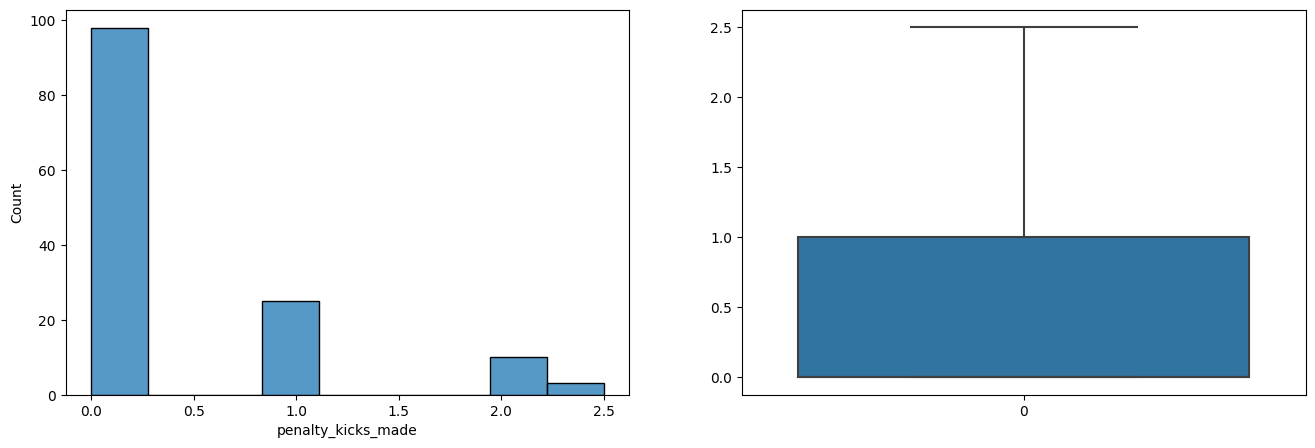

In [44]:
# distribution after capping
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(new_df_cap['penalty_kicks_made'])
plt.subplot(1,2,2)
sns.boxplot(new_df_cap['penalty_kicks_made'])
plt.show()

In [45]:
# set all age data in the new dataframe into the old dataframe and delete the newly created dataframe
df['penalty_kicks_made'] = new_df_cap['penalty_kicks_made'].astype(int)

del new_df_cap

## Outliers for penalty_kicks_attempted

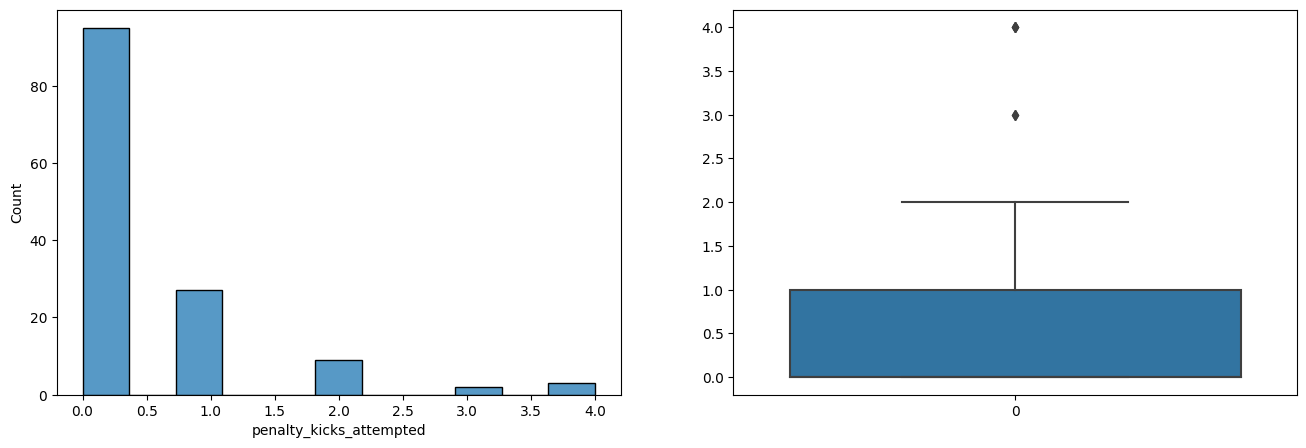

In [46]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['penalty_kicks_attempted'])
plt.subplot(1,2,2)
sns.boxplot(df['penalty_kicks_attempted'])
plt.show()

In [47]:
# cap the outliers by copying the data into a new dataframe before performing the capping

percentile20 = df['penalty_kicks_attempted'].quantile(0.20)
percentile80 = df['penalty_kicks_attempted'].quantile(0.80)
iqr = percentile80 - percentile20

upper_limit = percentile80 + 1.5 * iqr
lower_limit = percentile20 - 1.5 * iqr

new_df_cap = df.copy()
new_df_cap['penalty_kicks_attempted'] = np.where(
    new_df_cap['penalty_kicks_attempted'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['penalty_kicks_attempted'] < lower_limit,
        lower_limit,
        new_df_cap['penalty_kicks_attempted']
    )
)

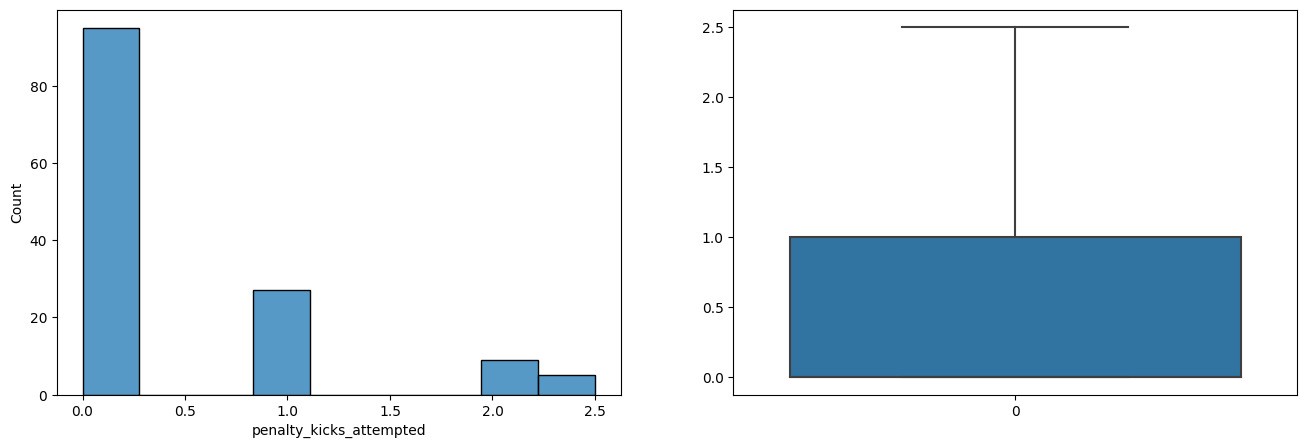

In [48]:
# distribution after capping
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(new_df_cap['penalty_kicks_attempted'])
plt.subplot(1,2,2)
sns.boxplot(new_df_cap['penalty_kicks_attempted'])
plt.show()

In [49]:
# set all age data in the new dataframe into the old dataframe and delete the newly created dataframe
df['penalty_kicks_attempted'] = new_df_cap['penalty_kicks_attempted'].astype(int)

del new_df_cap

## Univariate analysis for penalty kicks made and penalty kicks attempted

Most teams don't have penalty kicks made and penalty kicks attempted. this could be that most of the matches are not draw matches or the teams don't really get to the extent of having fouls

## Outliers for yellow_cards

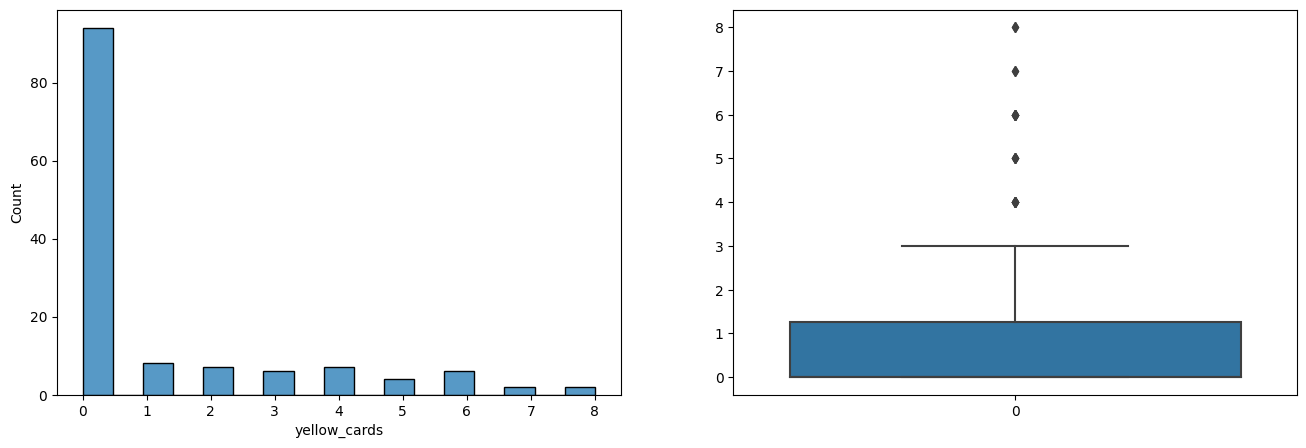

In [50]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['yellow_cards'])
plt.subplot(1,2,2)
sns.boxplot(df['yellow_cards'])
plt.show()

In [51]:
# cap the outliers by copying the data into a new dataframe before performing the capping

percentile25 = df['yellow_cards'].quantile(0.25)
percentile75 = df['yellow_cards'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df_cap = df.copy()
new_df_cap['yellow_cards'] = np.where(
    new_df_cap['yellow_cards'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['yellow_cards'] < lower_limit,
        lower_limit,
        new_df_cap['yellow_cards']
    )
)

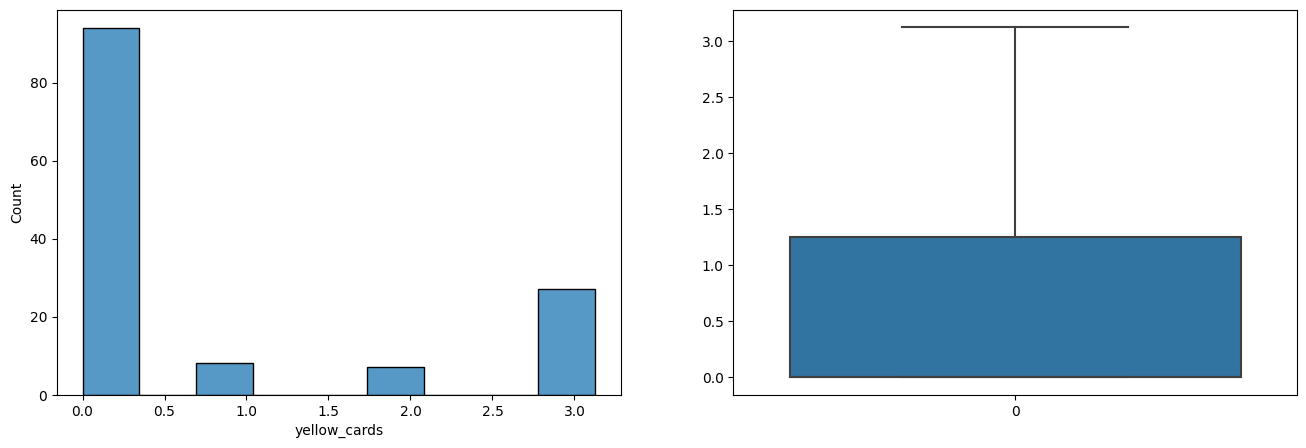

In [52]:
# distribution after capping
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(new_df_cap['yellow_cards'])
plt.subplot(1,2,2)
sns.boxplot(new_df_cap['yellow_cards'])
plt.show()

In [53]:
# set all age data in the new dataframe into the old dataframe and delete the newly created dataframe
df['yellow_cards'] = new_df_cap['yellow_cards'].astype(int)

del new_df_cap

## Outliers for red_cards

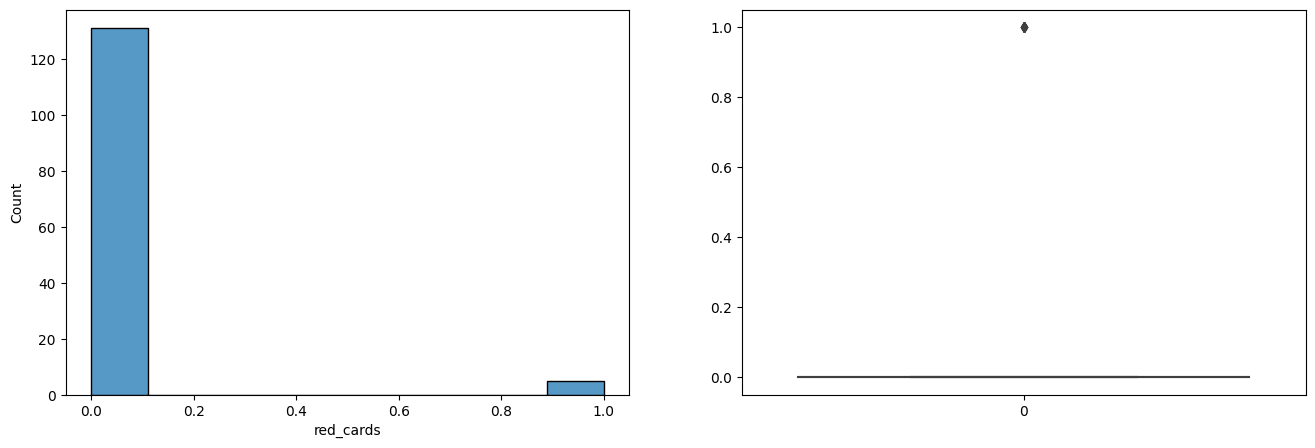

In [54]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['red_cards'])
plt.subplot(1,2,2)
sns.boxplot(df['red_cards'])
plt.show()

## Univariate analysis for yellow cards and red cards

We won't cap the red card column. It's obvious that most teams don't get yellow and red cards. however, the frequency of teams that don't get red cards is more than that of yellow cards

## Outliers for goals_per_90

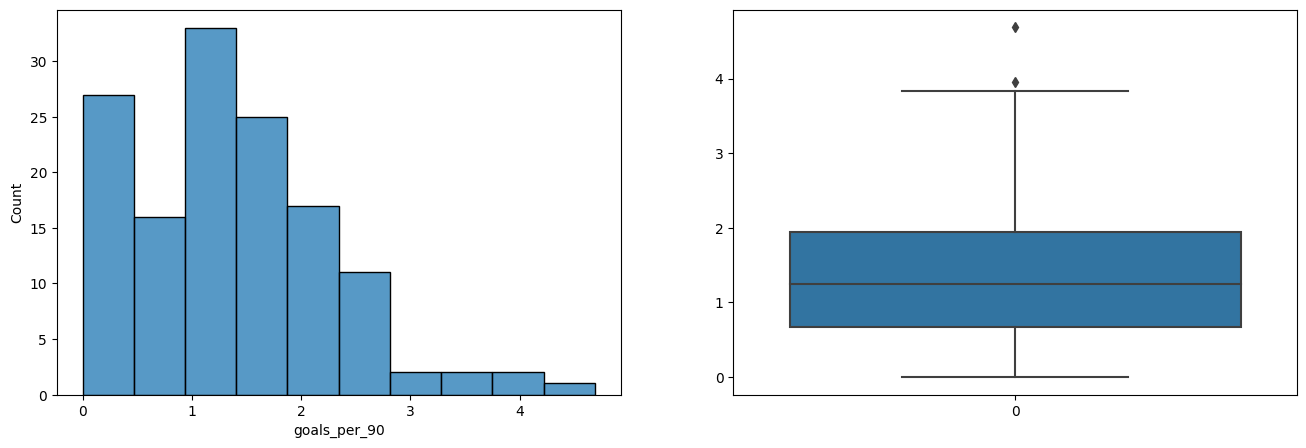

In [55]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['goals_per_90'])
plt.subplot(1,2,2)
sns.boxplot(df['goals_per_90'])
plt.show()

In [56]:
# cap the outliers by copying the data into a new dataframe before performing the capping

percentile25 = df['goals_per_90'].quantile(0.25)
percentile75 = df['goals_per_90'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df_cap = df.copy()
new_df_cap['goals_per_90'] = np.where(
    new_df_cap['goals_per_90'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['goals_per_90'] < lower_limit,
        lower_limit,
        new_df_cap['goals_per_90']
    )
)

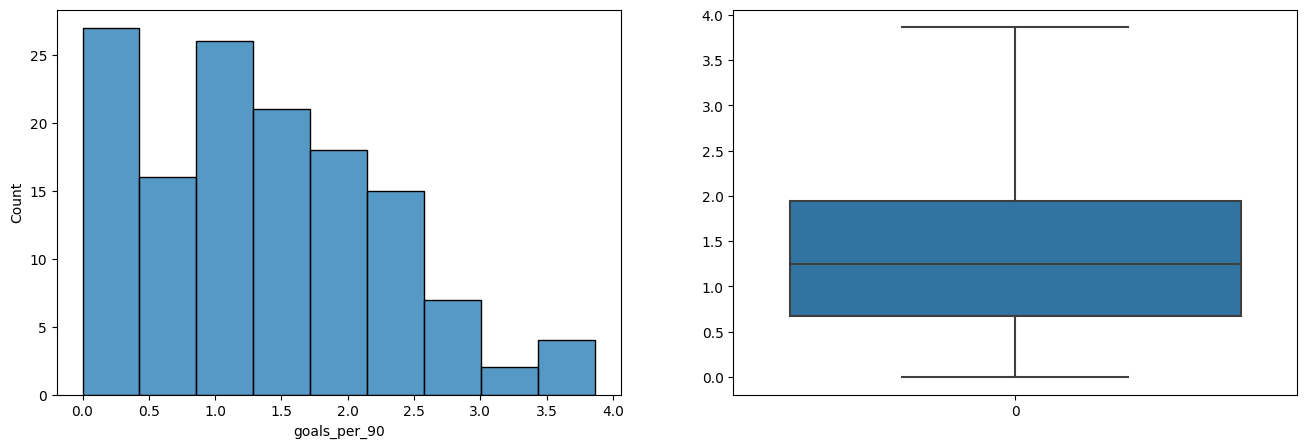

In [57]:
# distribution after capping
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(new_df_cap['goals_per_90'])
plt.subplot(1,2,2)
sns.boxplot(new_df_cap['goals_per_90'])
plt.show()

In [58]:
# set all age data in the new dataframe into the old dataframe and delete the newly created dataframe
df['goals_per_90'] = new_df_cap['goals_per_90'].astype(int)

del new_df_cap

## Univariate analysis of goals_per_90

The number of goals gotten by teams per 90 minutes of playtime is somewhat evenly distributed.

## Outliers for assists_per_90

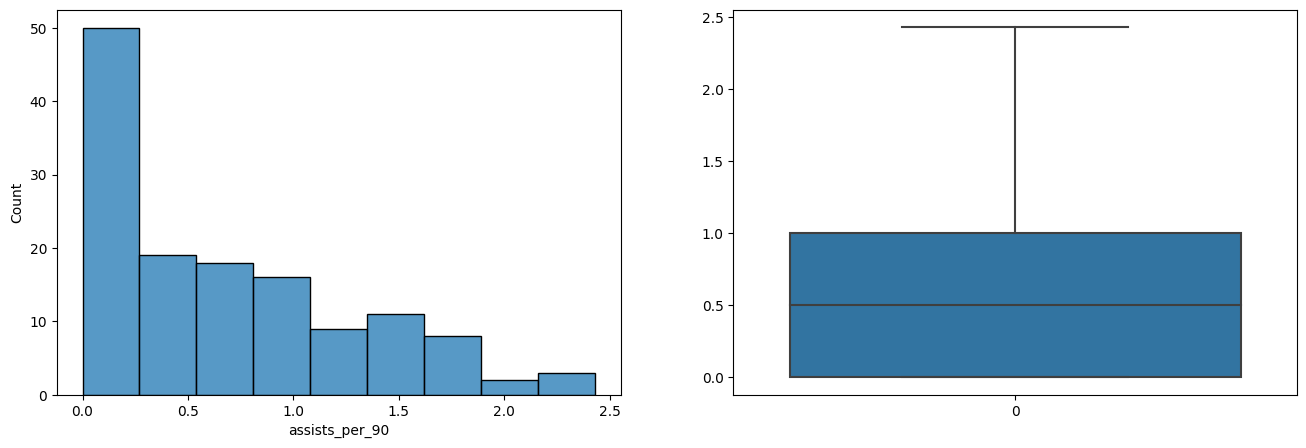

In [59]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['assists_per_90'])
plt.subplot(1,2,2)
sns.boxplot(df['assists_per_90'])
plt.show()

## Univariate analysis for assists per 90

Most teams don't have assists per 90 minutes. This is still a hint that most teams go by individual effort instead of team work.

# Outliers for goals_plus_assists_per_90

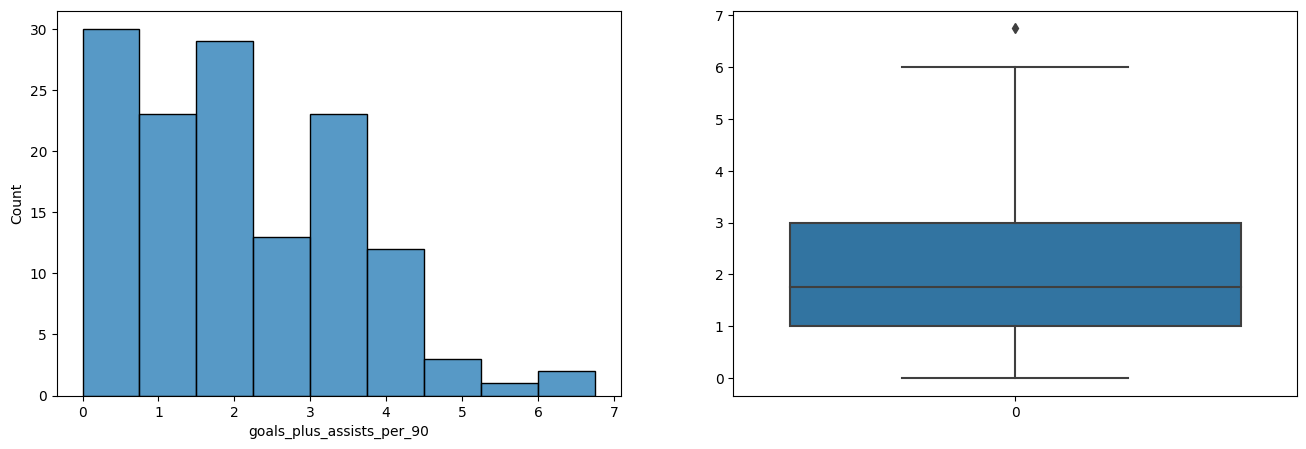

In [60]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['goals_plus_assists_per_90'])
plt.subplot(1,2,2)
sns.boxplot(df['goals_plus_assists_per_90'])
plt.show()

In [61]:
# cap the outliers by copying the data into a new dataframe before performing the capping

percentile25 = df['goals_plus_assists_per_90'].quantile(0.25)
percentile75 = df['goals_plus_assists_per_90'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df_cap = df.copy()
new_df_cap['goals_plus_assists_per_90'] = np.where(
    new_df_cap['goals_plus_assists_per_90'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['goals_plus_assists_per_90'] < lower_limit,
        lower_limit,
        new_df_cap['goals_plus_assists_per_90']
    )
)

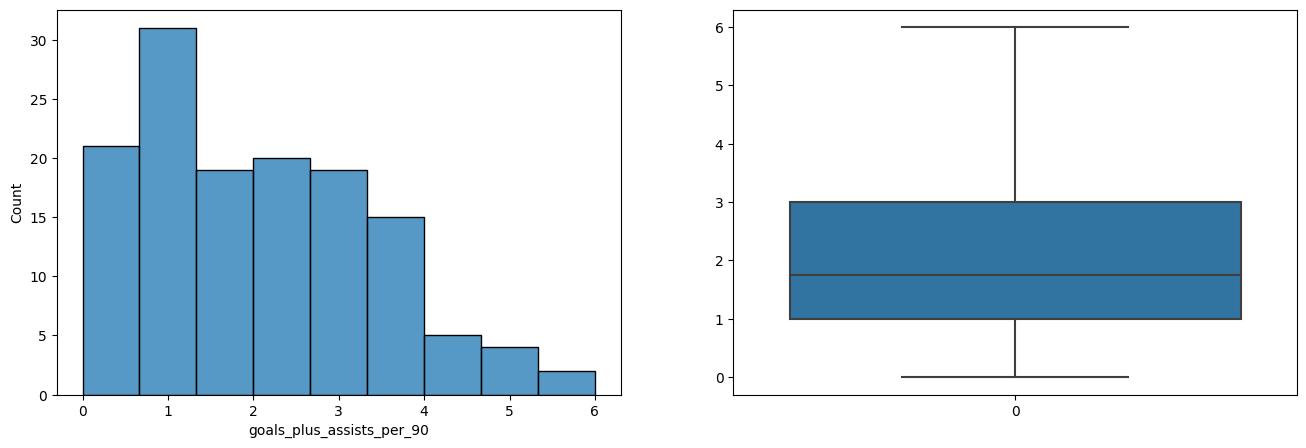

In [62]:
# distribution after capping
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(new_df_cap['goals_plus_assists_per_90'])
plt.subplot(1,2,2)
sns.boxplot(new_df_cap['goals_plus_assists_per_90'])
plt.show()

In [63]:
# set all age data in the new dataframe into the old dataframe and delete the newly created dataframe
df['goals_plus_assists_per_90'] = new_df_cap['goals_plus_assists_per_90'].astype(int)

del new_df_cap

##  Univariate analysis for goals_plus_assists_per_90

Most teams have lesser values for this. The few teams that have the higher extremes are teams that have good attacking performances and this could increase their chances of winning. We'll find out.

# Outliers for goals_minus_penalty_kicks_per_90

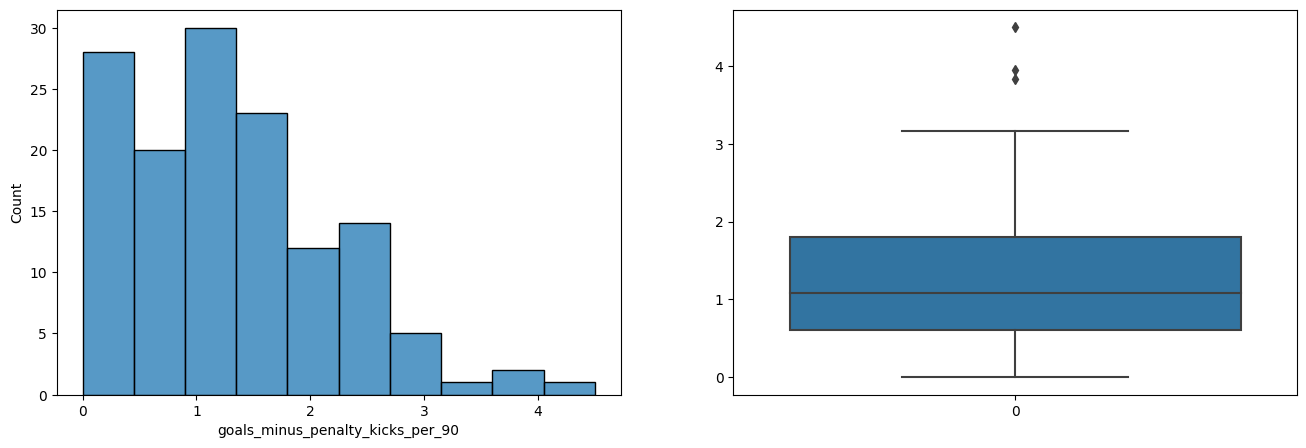

In [64]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['goals_minus_penalty_kicks_per_90'])
plt.subplot(1,2,2)
sns.boxplot(df['goals_minus_penalty_kicks_per_90'])
plt.show()

In [65]:
# cap the outliers by copying the data into a new dataframe before performing the capping

percentile25 = df['goals_minus_penalty_kicks_per_90'].quantile(0.25)
percentile75 = df['goals_minus_penalty_kicks_per_90'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df_cap = df.copy()
new_df_cap['goals_minus_penalty_kicks_per_90'] = np.where(
    new_df_cap['goals_minus_penalty_kicks_per_90'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['goals_minus_penalty_kicks_per_90'] < lower_limit,
        lower_limit,
        new_df_cap['goals_minus_penalty_kicks_per_90']
    )
)

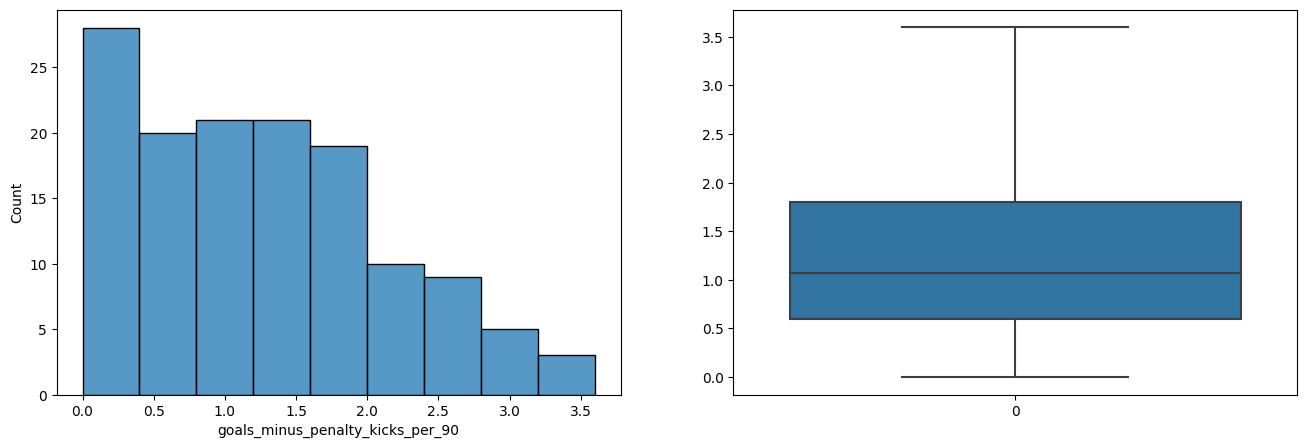

In [66]:
# distribution after capping
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(new_df_cap['goals_minus_penalty_kicks_per_90'])
plt.subplot(1,2,2)
sns.boxplot(new_df_cap['goals_minus_penalty_kicks_per_90'])
plt.show()

In [67]:
# set all data in the new dataframe into the old dataframe and delete the newly created dataframe
df['goals_minus_penalty_kicks_per_90'] = new_df_cap['goals_minus_penalty_kicks_per_90']

del new_df_cap

## Univariate analysis for goals minus penalty kicks per 90

This metric is important in showing the scoring ability of teams. The fewer teams that have the higher extremes of this metric has more scoring ability than the other teams

## Outliers for goals_plus_assists_minus_penalty_kicks_per_90

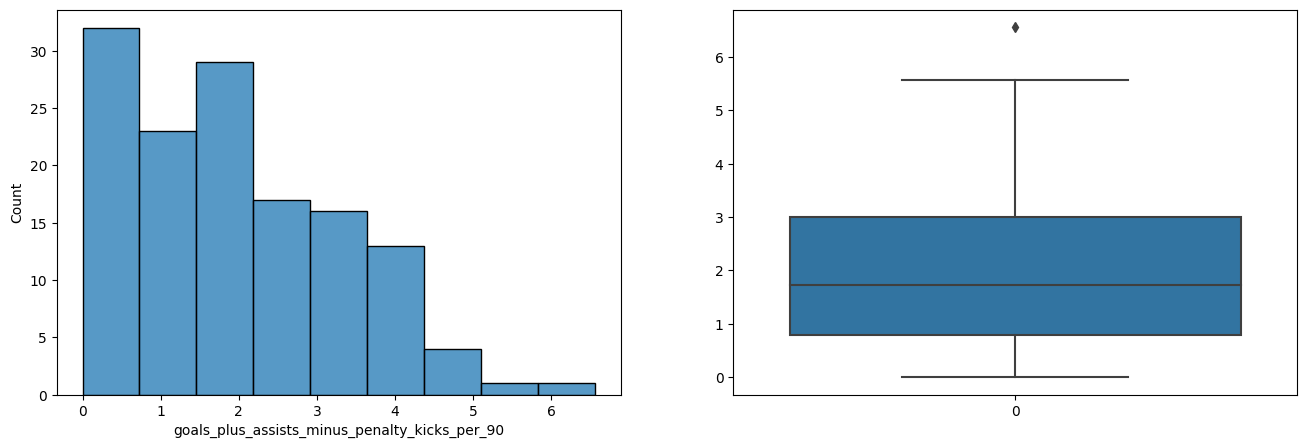

In [68]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['goals_plus_assists_minus_penalty_kicks_per_90'])
plt.subplot(1,2,2)
sns.boxplot(df['goals_plus_assists_minus_penalty_kicks_per_90'])
plt.show()

In [69]:
# cap the outliers by copying the data into a new dataframe before performing the capping

percentile25 = df['goals_plus_assists_minus_penalty_kicks_per_90'].quantile(0.25)
percentile75 = df['goals_plus_assists_minus_penalty_kicks_per_90'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df_cap = df.copy()
new_df_cap['goals_plus_assists_minus_penalty_kicks_per_90'] = np.where(
    new_df_cap['goals_plus_assists_minus_penalty_kicks_per_90'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['goals_plus_assists_minus_penalty_kicks_per_90'] < lower_limit,
        lower_limit,
        new_df_cap['goals_plus_assists_minus_penalty_kicks_per_90']
    )
)

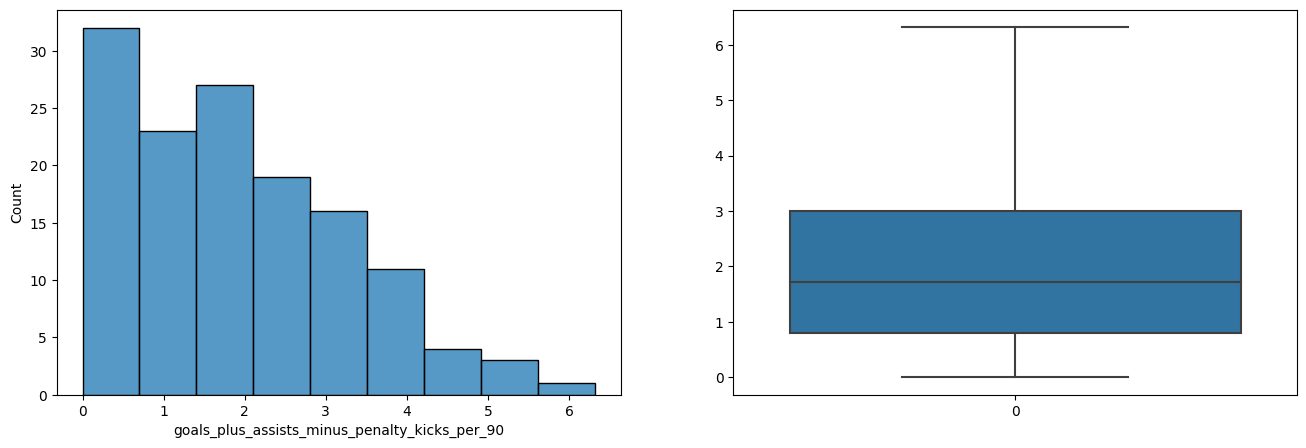

In [70]:
# distribution after capping
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(new_df_cap['goals_plus_assists_minus_penalty_kicks_per_90'])
plt.subplot(1,2,2)
sns.boxplot(new_df_cap['goals_plus_assists_minus_penalty_kicks_per_90'])
plt.show()

In [71]:
# set all age data in the new dataframe into the old dataframe and delete the newly created dataframe
df['goals_plus_assists_minus_penalty_kicks_per_90'] = new_df_cap['goals_plus_assists_minus_penalty_kicks_per_90'].astype(int)

del new_df_cap

## Univariate analysis of goals plus assists minus penalty kicks per 90

This metric shows a combination of team work and scoring ability of teams. The few teams at the higher extremes exhibit team work which increased their scoring ability

# Deriving Some Features

## Adding a column that shows FIFA world cup champions by year

In [72]:
# Add a default value for new column
df['champions'] = 0

# Add conditions to fill in champions
df.loc[(df['squad'] == 'USA') & (df['year'] == '1991'), 'champions'] = 1
df.loc[(df['squad'] == 'Norway') & (df['year'] == '1995'), 'champions'] = 1
df.loc[(df['squad'] == 'USA') & (df['year'] == '1999'), 'champions'] = 1
df.loc[(df['squad'] == 'Germany') & (df['year'] == '2003'), 'champions'] = 1
df.loc[(df['squad'] == 'Germany') & (df['year'] == '2007'), 'champions'] = 1
df.loc[(df['squad'] == 'Japan') & (df['year'] == '2011'), 'champions'] = 1
df.loc[(df['squad'] == 'USA') & (df['year'] == '2015'), 'champions'] = 1
df.loc[(df['squad'] == 'USA') & (df['year'] == '2019'), 'champions'] = 1

## Adding a column that shows FIFA world cup hosting countries by year

In [73]:
# Add a default value for new column
df['hosts'] = 0

# Add conditions to fill in champions
df.loc[(df['squad'] == 'China') & (df['year'] == '1991'), 'hosts'] = 1
df.loc[(df['squad'] == 'Sweden') & (df['year'] == '1995'), 'hosts'] = 1
df.loc[(df['squad'] == 'USA') & (df['year'] == '1999'), 'hosts'] = 1
df.loc[(df['squad'] == 'USA') & (df['year'] == '2003'), 'hosts'] = 1
df.loc[(df['squad'] == 'China') & (df['year'] == '2007'), 'hosts'] = 1
df.loc[(df['squad'] == 'Germany') & (df['year'] == '2011'), 'hosts'] = 1
df.loc[(df['squad'] == 'Canada') & (df['year'] == '2015'), 'hosts'] = 1
df.loc[(df['squad'] == 'France') & (df['year'] == '2019'), 'hosts'] = 1

## Adding a column to check proximity of teams and host countries

To determine if the proximity between team countries and the host countries affect performance, we need to calcualte the distances between countries and the host

In [74]:
# Add conditions to fill in newly created host country column
df.loc[df['year'] == '1991', 'host_country'] = 'China'
df.loc[df['year'] == '1995', 'host_country'] = 'Sweden'
df.loc[df['year'] == '1999', 'host_country'] = 'USA'
df.loc[df['year'] == '2003', 'host_country'] = 'USA'
df.loc[df['year'] == '2007', 'host_country'] = 'China'
df.loc[df['year'] == '2011', 'host_country'] = 'Germany'
df.loc[df['year'] == '2015', 'host_country'] = 'Canada'
df.loc[df['year'] == '2019', 'host_country'] = 'France'

In [75]:
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
geolocator = Nominatim(user_agent='Nancy Amandi', timeout=10)

# find the longitude and latitude of host and team countries
df['col1'] = df['host_country'].apply(geolocator.geocode)
df['col2'] = df['squad'].apply(geolocator.geocode)

In [76]:
# extract the longitude and latitude of the different countries into different columns
df['lat1'] = df['col1'].apply(lambda x: x.latitude if x != None else None)
df['lon1'] = df['col1'].apply(lambda x: x.longitude if x != None else None)
df['lat2'] = df['col2'].apply(lambda x: x.latitude if x != None else None)
df['lon2'] = df['col2'].apply(lambda x: x.longitude if x != None else None)


# create a function that iterates over each lon and lat and calculates their distances in miles
def distance(row): 
    address1 = (row['lat1'], row['lon1']) 
    address2 = (row['lat2'], row['lon2']) 
    try: 
        return (geodesic(address1, address2).miles) 
    except ValueError: 
        return 0

df['distance_in_miles'] = df.apply(lambda row: int(round(distance(row))) if isinstance(distance(row), float) else distance(row), axis=1)

In [77]:
# drop the other derived columns that we need

df = df.drop(['col1', 'col2', 'lat1', 'lon1', 'lat2', 'lon2'], axis=1)
df

<a id='bi'></a>
# Bivariate Analysis

## Question 1: What number of players did champion teams usually have?

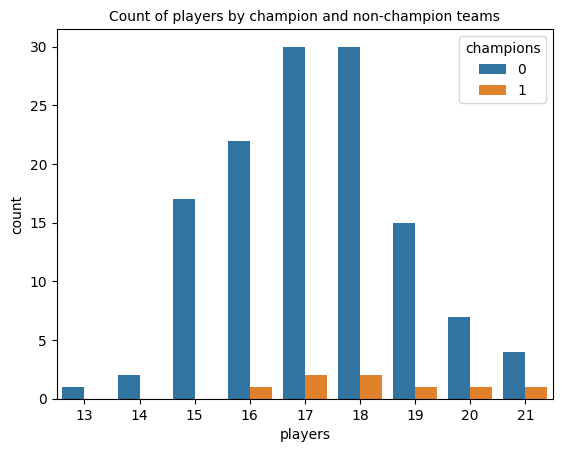

In [78]:
sns.countplot(data=df,  x='players', hue='champions')
plt.title('Count of players by champion and non-champion teams', fontsize=10);

**Champion teams usually had between 16 to 21 players. Teams that had players less than this range never won. But this doesn't mean that teams that had players within these ranges will win because as you can see, majority of those in these age ranges didn't win the match**

## Question 2: What was the average age of players in the champion teams

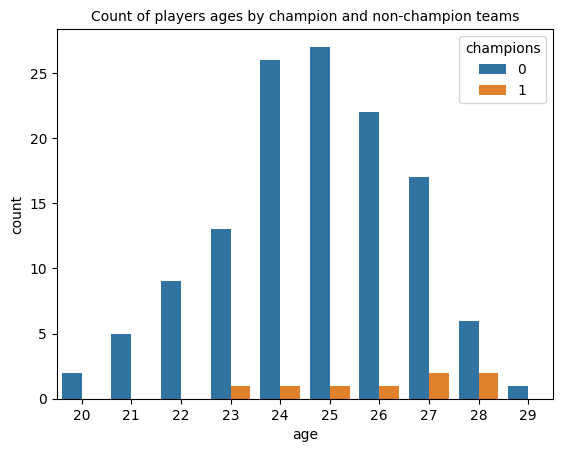

In [79]:
sns.countplot(data=df,  x='age', hue='champions')
plt.title('Count of players ages by champion and non-champion teams', fontsize=10);

**Champion teams usually had average ages of players between 23 and 28. Teams that had average ages outside these ranges never won. Also, teams with average ages of 27 and 28 won more. However, having players within these age ranges doesn't guarantee winning**

## Question 3: Is there a relationship between assists and goals?

In [80]:
# get the correlation coefficient between x and y
x = df['assists']
y= df['goals']
corr_coef = np.corrcoef(x, y)[0, 1]

corr_coef

0.7180536762678449

**Yes. Assists and goals have a positive relationship. That is, the higher the team work (assists), the more likely the team is to score goals**

## Question 4: Do more assists beget more champions?

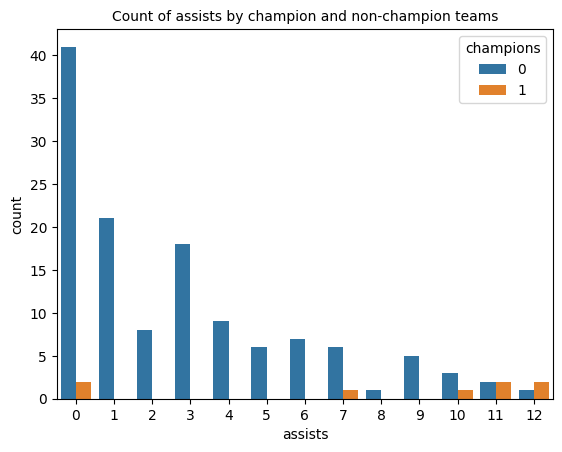

In [81]:
sns.countplot(data=df,  x='assists', hue='champions')
plt.title('Count of assists by champion and non-champion teams', fontsize=10);

**Although a particular team won without assists but most teams that had assists on a higher scale most likely won the games**

## Question 5: Is the distance between host and team countries related to performance?

In [82]:
# get the correlation coefficient between x and y
x = df['distance_in_miles']
y= df['goals']
corr_coef = np.corrcoef(x, y)[0, 1]

corr_coef

-0.1308006711973084

**No. A weak correlation exists between them so we can't say that they have a relationship**

## Question 6: Is there a relationship between assists and matches played?

In [83]:
# get the correlation coefficient between x and y
x = df['matches_played']
y= df['assists']
corr_coef = np.corrcoef(x, y)[0, 1]

corr_coef

0.6750714232470808

**According to the correlation coefficient, there's a fairly strong positive relationship between assists and matches played**

In [84]:
# write dataframe to csv file

df.to_csv('sports.csv', index=False)

<a id='multi'></a>
# Correlation Analysis

**We won't be using correlation heat map to do this because of the volume of columns to be compared. Instead, we'll be using correlation table**

In [85]:
# we'll select columns that are not derived from other columns
non_derived_params = ['players', 'age', 'possesion', 'matches_played', 'min_playing_time', 'goals', 'assists', 'penalty_kicks_made', 'penalty_kicks_attempted', 'yellow_cards', 'red_cards', 'distance_in_miles', 'champions', 'hosts']

# compute the correlation matrix
corr_matrix = df[non_derived_params].corr()

# create a correlation table from the correlation matrix
corr_table = corr_matrix.unstack().reset_index()
corr_table.columns = ['var1', 'var2', 'correlation']

# filter out the self-correlations and duplicate pairs
corr_table = corr_table[(corr_table['var1'] != corr_table['var2']) & (corr_table['var1'] < corr_table['var2'])]

# set the maximum number of rows to display to None (to display all rows)
pd.set_option('display.max_rows', None)
sorted_data = corr_table.sort_values(by='var1', ascending=True)

# display the correlation table
sorted_data

,var1,var2,correlation
25,age,distance_in_miles,-0.182665
27,age,hosts,0.248798
26,age,champions,0.156048
24,age,red_cards,0.038501
23,age,yellow_cards,0.240317
22,age,penalty_kicks_attempted,0.354176
20,age,assists,0.322135
21,age,penalty_kicks_made,0.328728
18,age,min_playing_time,0.395555
17,age,matches_played,0.355101


**Here's a list of our findings:**

- **Champions is unexpectedly uncorrelated to no features except goals where it's moderately correlated**


- **goals is highly correlated to three features: matches_played, min_playing_time, and assists**


- **assists is highly correlated to goals, matches_played, min_playing_time**


- **Proximity of teams to host countries doesn't affect their performance in any way**


- **matches_played and min_playing_time are almost perfectly correlated**


## Inferences


- **Using domain knowledge, it's understandable that as teams go to further stages their matches_played and min_playing_time increases and going to further stages implies they score more goals more than their opponents especially after they move past the group stages. However, this is different from the context of assists**


- **For goals to have high correlation with assists, it means that team work most likely influences the number of goals scored by teams which could automatically influence their team positions and probaly push them to be champion teams. But let's not conclude yet**


- **Since assists are correlated to goals and matches_played, it could imply two things and one of these things could be based on a certain condition. assists which measures team work could mean that teams that exhibit team play are most likely to move to the next stages of the matches. Secondly, it could also mean that teams that exhibit team play are most likely to turn champions but that's only based on the condition that goals highly influence the probability of teams turning champions**

**Hence, we'll be having some hypothesis to test**

<a id='statistics'></a>
# Statistical Modelling

# Hypothesis

Based on our inferences, here are the categories of our hypothesis: 


**Null Hypothesis 1: goals has no effect on teams winning the women FIFA world cup**

Whether or not it's rejected, we'll test the next hypothesis:


**Null Hypothesis 2: assists has no relationship with goals scored**

If **Null Hypothesis 1 and Null Hypothesis 2** are both not rejected, we'll make our conclusions.

If **Null Hypothesis 1 and Null Hypothesis 2** are both rejected, we'll make our conclusions.

If **Null Hypothesis 1** is not rejected and **Null Hypothesis 2** is rejected, then we'll test the next hypothesis:


**Null Hypothesis 3: assists has no relationship with the matches played**

Whatever findings we make at this last stage will give us our final conclusions.

## Null Hypothesis 1: goals has no effect on teams winning the women FIFA world cup

In [86]:
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import StandardScaler

# scale your data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df['goals'].values.reshape(-1,1))

# run logistic regression
model = sm.Logit(df['champions'], sm.add_constant(X_scaled)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.087450
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              champions   No. Observations:                  136
Model:                          Logit   Df Residuals:                      134
Method:                           MLE   Df Model:                            1
Date:                Mon, 20 Mar 2023   Pseudo R-squ.:                  0.6091
Time:                        01:02:54   Log-Likelihood:                -11.893
converged:                       True   LL-Null:                       -30.426
Covariance Type:            nonrobust   LLR p-value:                 1.143e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8121      1.404     -4.140      0.000      -8.563      -3.061
x1             2.6968      0

## Inference

According to our regression summary, our coefficient is positive meaning that goals have a positive effect on team performance. The p-value that is 0.000 is less than 0.05(our significance level). This means that the positive effect of goals on team performanec is statistically significant. 

We can trust this model because the R squared is approximately 0.61 which means that the independent variable (goals) explains 61% of the dependent variable (champions). Hence, the null hypothesis was rejected.

## Null Hypothesis 2: assists has no relationship with goals scored

In [160]:
# Scale the data using the StandardScaler
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(df['goals'].values.reshape(-1, 1))
X_scaled = scaler.fit_transform(df['assists'].values.reshape(-1, 1))

# Add constant to X_scaled
X_scaled = sm.add_constant(X_scaled)

# Fit the model using the scaled data
model = sm.OLS(Y_scaled, X_scaled).fit()

# Get the summary of the model
result = model.summary()
print(result)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     142.6
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           7.71e-23
Time:                        02:27:58   Log-Likelihood:                -143.69
No. Observations:                 136   AIC:                             291.4
Df Residuals:                     134   BIC:                             297.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.11e-16      0.060   1.85e-15      1.0

**This results show that this model can't be trusted because of the high skew and kurtosis of the residuals. Also, The R squared is moderately low. Let's work on this by using the weighted least regression method instead where data points with high variances will be given smaller weights.**

In [154]:
# Scale the data using StandardScaler
scaler = StandardScaler()

Y_scaled = scaler.fit_transform(df['goals'].values.reshape(-1, 1))
X_scaled = scaler.fit_transform(df['assists'].values.reshape(-1, 1))

# Add the column of ones to X_scaled
X_scaled = sm.add_constant(X_scaled)

# Fit the initial model using OLS
model_ols = sm.OLS(Y_scaled, X_scaled).fit()

# Calculate the residuals
residuals = model_ols.resid

# Calculate the weights based on the residuals
weights = 1 / (residuals ** 2)

# Fit the weighted least squares regression model
model_wls = sm.WLS(Y_scaled, X_scaled, weights=weights).fit()

# Get the summary of the model
result = model_wls.summary()
print(result)

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            WLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 4.152e+04
Date:                Mon, 20 Mar 2023   Prob (F-statistic):          6.89e-169
Time:                        02:14:01   Log-Likelihood:                -35.457
No. Observations:                 136   AIC:                             74.91
Df Residuals:                     134   BIC:                             80.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.004     -0.035      0.9

**Notice the difference between this weighted least regression(WLS) and the results from the ordinary least regression(OLS). The R squared went very high to 0.997 while the coefficient stayed as 0.71. The skew and kurtosis is still there. however, it's less than the one from OLS. The p-value is less than the significance level of 0.05**

So what does this tell us?

**We can say that we have a 95% confidence level that a positive relationship exists between the assists and the scored goals. The p-value of 0.000 which is less than 0.05 significance level shows that there's no sufficient evidence to prove us otherwise**

**At this point, we reject our null hypothesis**

<a id='Con'></a>
# Conclusion

- Through this analysis, we were able to find one strategy of successful teams in the women FIFA world cup and that is team spirit which is measured by the number of assists. 

- Our statistical test proved that the number of goals has an effect on turning teams to champions.

- Lastly, assists has a positive direct relationship with the number of goals scored. This could be relative based on the teams competing in a match though.

So see it this way:

**- Team spirit ---> assists (increases) ---> goals (increases relatively) ---> champion (increases likelihood)**

<a id='Rec'></a>
# Recommendations

Team coaches should improve team work in their players by doing the following during training: 
    
- Players should undergo drill exercises where they have to rely on each other to scale through

- Set measurable goals for team work like keeping track of the goals that had assists

- The coach should understand the strengths and weaknesses of players and put them in strategic positions where the strengths of one player complements the weakness of the other player beside her. This will make it easier for team work to reflect in the team

- At the end of the training match, the coach should go extra mile in calling out specific actions exhibited by some players that expressed team spirit. This will make players more team spirit conscious during the game

- Engage the players in team building activities

- Make every player feel heard and seen